#### DTU - 02805 Social graphs and interactions (2020) - Assignment B

## 2020 US Representatives and Senators Twitter Analysis

#### by Electra Zarafeta (s202238), Asterios Nastas (s202242),  Idriss El Quassimi (s192383)



## 0. From part A | Our 3 minutes movie

This is the 3 minutes movie of our Project Assignment:

<iframe width="600" height="300" src="https://www.youtube.com/embed/mGeYpSRlDVg" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## 1. Motivation

The aim of this analysis is to investigate the interactions between congress members of both the Republican and Democrat parties on Twitter, which is a social media that politicians use quite a lot to dicsuss, present their opinions and influence their followers. We will be able to understand how the two parties use twitter in order to promote their political work, we will gain insights regarding the political rally and investigate the main issues discussed during the elections. Do they focus on citizens' problems? How influential are they? Are they strong members of any community? How do they interbehave towards other congressmen, are they supporting their political allies, criticizing the other side or following their leader? We believe that it will be very interesting to analyze the above from a data scientist's prespective.

### 1.1 The dataset

The dataset we used contains the US House Representatives and Senators of 2020, their party, their Twitter account, the state and their Tweets in a specific period of time (including US election). We choose the data of the US congress because US is considered the most influential country in the world. In order to download the dataset we used the list of the congress people \[1] [from this site](https://triagecancer.org/congressional-social-media) and based on that we used the Twitter API to download all the required data, like Tweets, in which we will apply some of the tools used throughout the course.

### 1.2 Our vision

To get more insight into the state of the Congress during the 2020 and analyse the two sides of the Congress, *Democrats vs Republicans*, we chose to scrap each individuals tweets.
Thinking about it, Twitter, is the perfect platform to search more into it. People there, due to the Twitter's nature of *280 characters limit*, are forced
actually to **express their thoughts shortly** (without any extra words, politicians seem to love apparently). This is even more convenient, because with *Natural Language Processing*
analysis we hope to classificate better the way Democrats and Republicans use Twitter to influence and depict key topics of areas they specifically infrom the public about.

### 1.3 Our goal 


Our goal is to depict any differences between the US 2020 Representatives and Senators. By finding and analysing the political presence of the Congress on Twitter, we 
hope to get **core values that distinguish the Democrat from the Republican**, find the most influential people on the Congress and find any common patterns on the way politicians talk on the Internet. 
A particular intresting scenario would be to identify keywords based on the most influential people. We also want to understand whether the most influencial Democrats and Republicans share the type certain keywords when they want to
be the most infuential (like in case when they type something controversial for the sake of popularity and influence) they can be? 


## 2. Basic Stats

This section includes information about cleaning and preprocessing of the data as well as a short section exploring the basic implemented stats of the datasets.

### 2.0 Load Modules

Firstly, each needed module is loaded.

In [15]:
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import string
import numpy as np
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import operator
import pandas as pd
import regex as re
import seaborn as sns
import networkx as nx
from fa2 import ForceAtlas2
import community
from community import community_louvain
import prettytable
import math
import json
from nltk.tokenize import word_tokenize
import chart_studio.plotly as py
from plotly.offline import iplot
from collections import defaultdict
import twitter
from IPython.display import Image



lemmatizer = WordNetLemmatizer()  # assign the lemmatization function to a variable
pun = string.punctuation  # assign to a string all sets of punctuation
stops = nltk.corpus.stopwords.words('english')  # assign the list of english stop words (commonly used words)

In [16]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ezara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ezara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ezara\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 2.1 Twitter Scrapping

The first step was to scrap the needed data with the use of Twitter API. More info on the Scrap process can be found on the following iPython Notebook:
https://nbviewer.jupyter.org/github/ElectraZarafeta/Social_Graphs/blob/master/Twitter%20Scrapping.ipynb.
All the extracted data were saved to a csv file, *Data.csv*, which can be found on the **data** folder.

### 2.2 Data cleaning and preprocessing

In [20]:
# load data from csv
Data = pd.read_csv('./data/Data.csv')
# print some of the data 
Data.sample(n=10)

Party            Name                     State  \
260  Republican   Hagedorn, Jim    Minnesota 1st District   
470  Republican      Hurd, Will       Texas 23rd District   
106  Republican     Gaetz, Matt      Florida 1st District   
510    Democrat    Larsen, Rick   Washington 2nd District   
91     Democrat     Crow, Jason     Colorado 6th District   
226    Democrat  Brown, Anthony     Maryland 4th District   
444  Republican     Green, Mark    Tennessee 7th District   
323  Republican     Zeldin, Lee     New York 1st District   
69     Democrat  Sánchez, Linda  California 38th District   
448  Republican    Cornyn, John                     Texas   

                 Chamber TwitterUsernames  \
260  U.S. Representative      RepHagedorn   
470  U.S. Representative    HurdOnTheHill   
106  U.S. Representative        MattGaetz   
510  U.S. Representative    RepRickLarsen   
91   U.S. Representative     RepJasonCrow   
226  U.S. Representative  RepAnthonyBrown   
444  U.S. Representative     RepMarkGreen   
323  U.S. Representative     RepLeeZeldin   
69   U.S. Representative  RepLindaSanchez   
448         U.S. Senator       JohnCornyn   

                                                Tweets  
260  RT @SteveScalise: Let me get this straight:\n\...  
470  Chris Krebs is a true patriot. He was instrume...  
106  RT @LouDobbs: Time to Stand and Fight: @mattga...  
510  .@StanCamNEWS a wonderful annual effort that t...  
91   It takes courage to speak up. These women must...  
226  We must recognize that national security isn’t...  
444  We know there were toxins at the K2 base.\n\nW...  
323  Shocker... The better question for @CNN is why...  
69   RT @CDCgov: Everyone reacts differently to str...  
448  Bernieworld seethes over Tanden as OMB nominee...

In order to fetch for each representative/ senator the mentioned or retweeted accounts, we use the following regex:   
`\s([@][\w_-]+)`. This returns the `@twittername`. So our graph will have as nodes the Representatives/ Senators who have Twitter account and as edges the Tweets (mentions/ retweets).

In [21]:
# Create Directed Graph based on mentions and retweets
def directed_graph(Data):
    # regex for mentions/ retweets
    regex_mentions_retweets = "\s([@][\w_-]+)"

    G = nx.DiGraph()

    for i in range(len(Data)): # loop through the representatives/ senators
        name = Data["TwitterUsernames"][i] 
        G.add_node(name, Party=Data["Party"][i], Tweets=Data["Tweets"][i])  # new entry of representative/ senator in the graph
        usernames_before = re.findall(regex_mentions_retweets, Data["Tweets"][i]) # list of mentioned/ retweeted accounts

        for username in usernames_before:
            username = username.strip().split('@')[1] # remove @ symbol

            if (username in Data["TwitterUsernames"].values) and (username != name):  # check if account is in the representatives/ senators list
                G.add_edge(name, username)

    return G

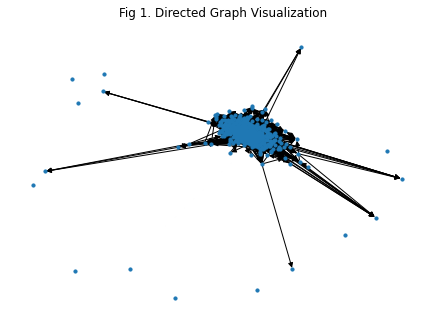

In [22]:
G = directed_graph(Data) # call function for directed graph generation

# draw directed graph
plt.figure()
nx.draw(G, node_size=10)
plt.title("Fig 1. Directed Graph Visualization")
plt.show()

Based on the specific graph it's not possble to extract any valuable information, so we will continue with some further analysis and more useful tools will be presented.

### 2.3 Basic stats

We will continue with some basic information extracted from our Data which will be useful for the rest of the analysis.

In [23]:
# Create Giant Connected Component - GCC
def giant_connected_component(G):
    largest_cc = max(nx.weakly_connected_components(G), key=len)
    GCC = G.subgraph(largest_cc)

    print("There are {} links in the GCC network.".format(GCC.number_of_edges()))
    print("There are {} nodes in the GCC network.".format(GCC.number_of_nodes()))

    between_representatives = 0

    for edge in GCC.edges:
        if GCC.nodes[edge[0]]['Party'] != GCC.nodes[edge[1]]['Party']:
            between_representatives += 1

    print(f'Number of links between the representatives/ senators of different party: {between_representatives}')
    print(f'Percentage of links between the representatives/ senators of different party: {round(between_representatives / GCC.number_of_edges() * 100, 1)} %')

    return GCC

GCC = giant_connected_component(G)

There are 4947 links in the GCC network.
There are 526 nodes in the GCC network.
Number of links between the representatives/ senators of different party: 890
Percentage of links between the representatives/ senators of different party: 18.0 %


As we can see the total number of links in our network is 4947 and the total number of nodes is 527 representatives/ senators. Also, it is worth mentioning that there are 890 connections (18%) between the Republicans and Democrats and, therefore, we understand that it is frequent the two parties' representatives to interact through Twitter. We can assume that they mostly critisize their political competitors.

In [24]:
def in_out_deg(G):
    in_deg = []
    for i in G.nodes:
        in_deg.append(G.in_degree(i))

    index_max_in = sorted(range(len(in_deg)), reverse=True, key=lambda k: in_deg[k])

    node_names = []
    for i in G.nodes:
        node_names.append(i)

    index_max_in = index_max_in[0:5]

    print('The 5 most connected in-degree representatives/ senators are:')

    for i in range(len(index_max_in)):
        index = index_max_in[i]
        print(node_names[index])

    out_deg = []
    for i in G.nodes:
        out_deg.append(G.out_degree(i))

    index_max_out = sorted(range(len(out_deg)), reverse=True, key=lambda k: out_deg[k])

    index_max_out = index_max_out[0:5]

    print('\nThe 5 most connected out-degree representatives/ senators are:')

    for i in range(len(index_max_out)):
        index = index_max_out[i]
        print(node_names[index])

    #return in_deg, out_deg


in_out_deg(GCC)

The 5 most connected in-degree representatives/ senators are:
SpeakerPelosi
GOPLeader
SteveScalise
KamalaHarris
SenSchumer

The 5 most connected out-degree representatives/ senators are:
SteveScalise
RepBradWenstrup
RepGuthrie
RepBonnie
RepRashida


Some of the most mentioned and retweeted representatives/ senators are *Nancy Pelosi*, *Kevin McCarthy*, *Steve Scalise*, *Kamala Harris* and *Chuck Schumer*. *Nancy Pelosi* and *Kevin McCarthy* are the leaders of the Democratic and Republican party correspondigly and therefore it is reasonable that they are on the top of the most mentioned/ retweeted accounts, their followers prefer to post based on their words. \[2] Also, the representatives/ senators that retweet or mention other congrees members mostly are: *Steve Scalise*, *Brad Wenstrup*, *S. Brett Guthrie*, *Bonnie Watson Coleman* and *Rashida Tlaib*.  

Let's take a look on the distribution of the in and out degree.

Maximum in-degree in network:  126
Minimum in-degree in network:  0


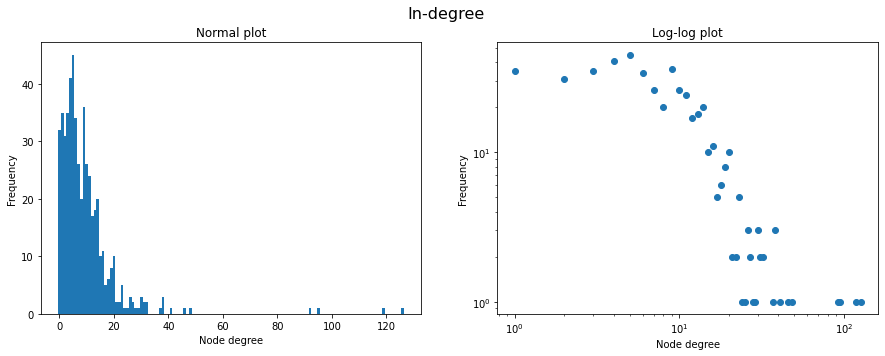

Maximum out-degree in network:  39
Minimum out-degree in network:  0


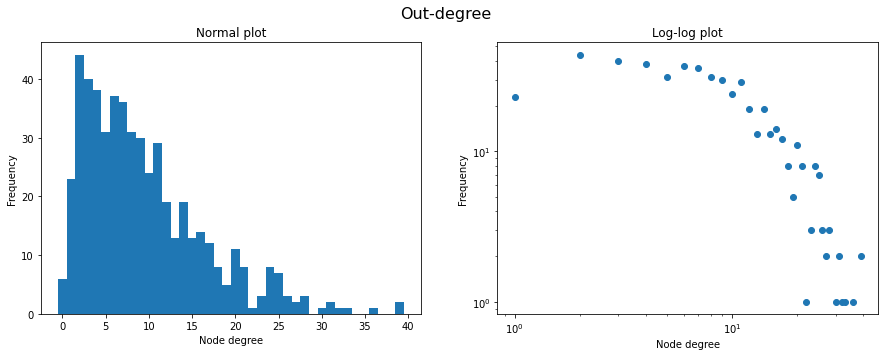

In [25]:
 def distribution(GCC):
    plt.rcParams["patch.force_edgecolor"] = False

    # In degree
    in_degree = sorted([d for n, d in GCC.in_degree()], reverse=False)
    dmax = max(in_degree)
    dmin = min(in_degree)

    print('Maximum in-degree in network: ', dmax)
    print('Minimum in-degree in network: ', dmin)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15,5])
    fig.suptitle('In-degree', fontsize = 16)

    counts, bins = np.histogram(in_degree, bins = np.arange(dmin-0.5, dmax+1.5,1))
    ax1.hist(in_degree, bins = bins)
    ax1.set_xlabel('Node degree')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Normal plot')

    ax2.loglog(np.arange(dmin, dmax+1,1), counts, 'o')
    ax2.set_xlabel('Node degree')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Log-log plot')
    plt.show()

    # Out degree
    out_degree = sorted([d for n, d in GCC.out_degree()], reverse=False)
    dmax = max(out_degree)
    dmin = min(out_degree)

    print('Maximum out-degree in network: ', dmax)
    print('Minimum out-degree in network: ', dmin)


    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15,5])
    fig.suptitle('Out-degree', fontsize = 16)

    counts, bins = np.histogram(out_degree, bins = np.arange(dmin-0.5, dmax+1.5,1))
    ax1.hist(out_degree, bins = bins)
    ax1.set_xlabel('Node degree')
    ax1.set_ylabel('Frequency')
    ax1.set_title('Normal plot')

    ax2.loglog(np.arange(dmin, dmax+1,1), counts, 'o')
    ax2.set_xlabel('Node degree')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Log-log plot')
    plt.show()

    return in_degree, out_degree


in_degree, out_degree = distribution(GCC)

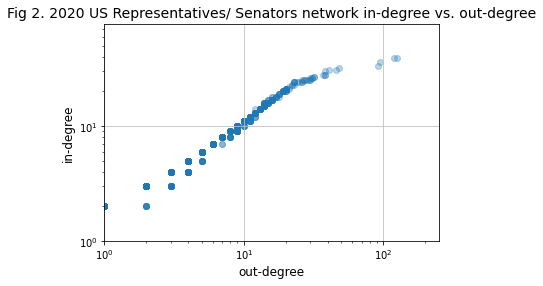

Correlation coefficient is: 0.8586150792739127


In [26]:
fig, ax = plt.subplots()

ax.set_title("Fig 2. 2020 US Representatives/ Senators network in-degree vs. out-degree", fontsize=14)
ax.set_xlabel("out-degree", fontsize=12)
ax.set_ylabel("in-degree", fontsize=12)

ax.grid(True, linestyle='-', color='0.75')
ax.set_xlim([1, max(in_degree) * 2])
ax.set_ylim([1, max(out_degree) * 2])
ax.set_xscale('log')
ax.set_yscale('log')

plt.scatter(in_degree, out_degree, alpha=0.3)

plt.show()

print('Correlation coefficient is: {0}'.format(
    np.corrcoef(
        x=out_degree, y=in_degree)[0, 1]))

Continuing with the *degree distribution*, as we can see on the above figures there is no big difference on the frequencies of in and out degree. The in-dregree reachs up to 126, while the out-degree goes from 0 to 39. Generally, the frequency is quite low which is expected given the *network's nature*. It is reasonable that a big amount of the tweets will not contain mentions or retweets, but just plain text. Social media networks usually have a power low distribution and most accounts do not have that many interactions.  
Regarding the *correlation coefficient* between in and out-degree we can clearly see that nodes with high in-degree tends to have a high out-degree aswell.   

Also, we thought that it would be interesting to investigate which party tweets (mentions/ retweets) the most.

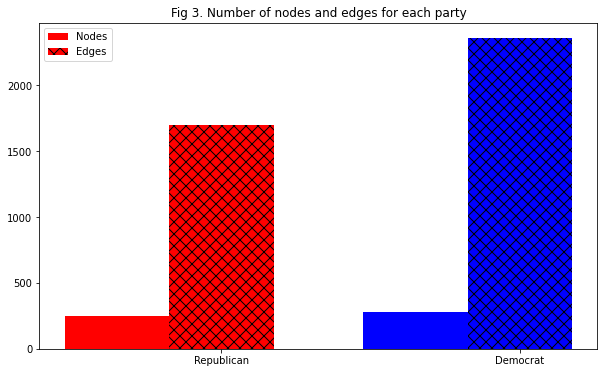

In [27]:
plt.rcParams["figure.figsize"] = [10, 6]

fig, ax = plt.subplots()

sizes_nodes = [len([x for x,y in GCC.nodes(data=True) if y['Party']=="Republican"]), len([x for x,y in GCC.nodes(data=True) if y['Party']=="Democrat"])]
sizes_edges = [len([edge for edge in GCC.edges if GCC.nodes[edge[0]]['Party'] == "Republican" and GCC.nodes[edge[1]]['Party'] == "Republican"]), len([edge for edge in GCC.edges if GCC.nodes[edge[0]]['Party'] == "Democrat" and GCC.nodes[edge[1]]['Party'] == "Democrat"])]

ind = np.arange(len(sizes_nodes))
width = 0.35
colors = ['red', 'blue']

rects1 = ax.bar(ind, sizes_nodes, width, color = colors)
rects2 = ax.bar(ind+width, sizes_edges, width, color = colors, hatch=r"//\\")

ax.legend((rects1[0], rects2[0]), ("Nodes", "Edges"))

ax.set_xticks(ind+width)
ax.set_xticklabels(["Republican", "Democrat"])
plt.title("Fig 3. Number of nodes and edges for each party")
plt.show()

Based on the above figure we can see that even the number of representatives/ senators each party has is almost equally. As we already know the elected Democrats representatives and senators for 2020 were 280 and the Republicans were 247 \[3], \[4]. We can see that all of the congess members use Twitter, this proves the power that Twitter has in the US politics.   
Regarding the interaction between the congess members, based on the above figure the Democrats connect, communicate and interact with each other much more rather than the Republicans do. 

Finally, in our `Basic stats` analysis we will present our network in a coloured graph and we will see how their interactions and communications can be visualized.

In [28]:
# create the undirected graph
GU = GCC.to_undirected()

100%|██████████| 4000/4000 [00:05<00:00, 676.76it/s]
BarnesHut Approximation  took  4.16  seconds
Repulsion forces  took  0.08  seconds
Gravitational forces  took  0.08  seconds
Attraction forces  took  0.73  seconds
AdjustSpeedAndApplyForces step  took  0.42  seconds


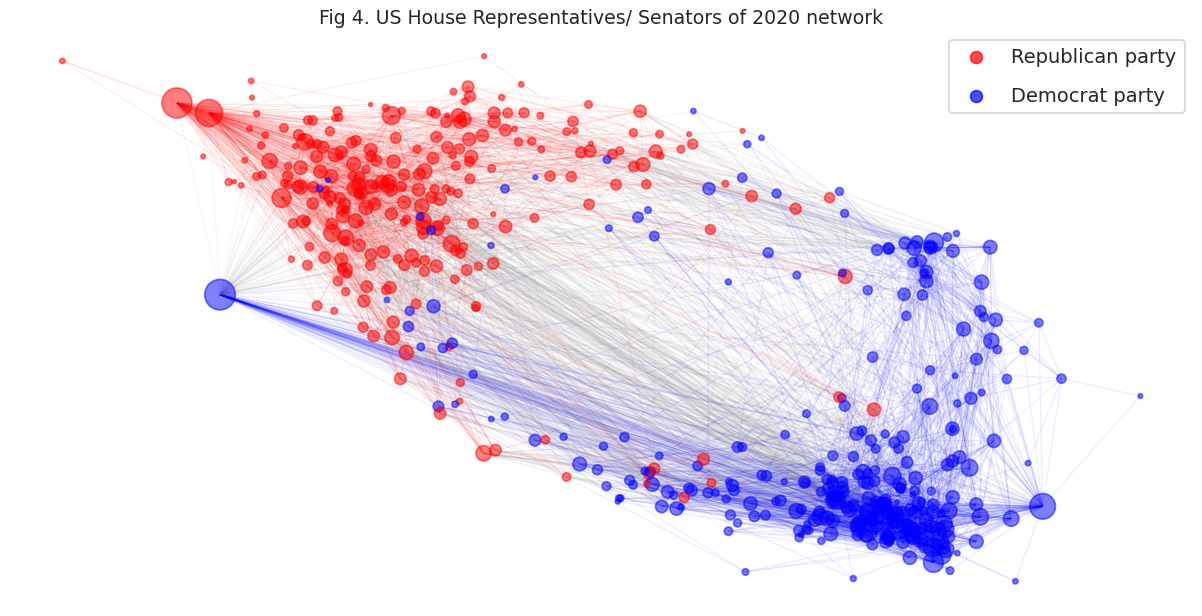

In [29]:
def forceatlas_graph(GU):
    # Color nodes according to party
    colors = []
    for n in list(GU.nodes(data="Party")):
        if 'Republican' in n:
            colors.append('red')
        else:
            colors.append('blue')

            # Scale node-size according to degree
    d = nx.degree(GU)
    sizes = [(d[node] + 1) * 5 for node in GU.nodes()]

    # Color edges according to between-party or not
    edge_colors = []
    for edge in GU.edges:
        if GU.nodes[edge[0]]['Party'] != GU.nodes[edge[1]]['Party']:
            edge_colors.append('grey')
        else:
            if GU.nodes[edge[0]]['Party'] == 'Republican':
                edge_colors.append('red')
            else:
                edge_colors.append('blue')

    # Specify the settings for the Force Atlas 2 algorithm
    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        linLogMode=False,  # NOT IMPLEMENTED
        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
        edgeWeightInfluence=7.0,

        # Performance
        jitterTolerance=0.5,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=40,
        multiThreaded=False,  # NOT IMPLEMENTED

        # Tuning
        scalingRatio=0.5,
        strongGravityMode=False,
        gravity=0,

        # Log
        verbose=True)

    positions = forceatlas2.forceatlas2_networkx_layout(GU, pos=None, iterations=4000)

    plt.figure(num=None, figsize=(18, 9), dpi=85, facecolor='w', edgecolor='k')

    sns.set_style('whitegrid')
    sns.set_context('talk')

    # create legend
    plt.scatter([], [], c='red', alpha=0.7, s=100, label='Republican party')
    plt.scatter([], [], c='blue', alpha=0.7, s=100, label='Democrat party')
    plt.legend(scatterpoints=1, frameon=True, labelspacing=1)

    nx.draw_networkx_nodes(GU, positions, node_size=sizes, node_color=colors, alpha=0.5)
    nx.draw_networkx_edges(GU, positions, edge_color=edge_colors, alpha=0.08)
    ax = plt.gca()
    ax.collections[0].set_linewidth(0.1)
    ax.set_title('Fig 4. US House Representatives/ Senators of 2020 network', fontsize=16);
    plt.axis('off')
    plt.show()


forceatlas_graph(GU)

So, this is the 2020 US Representatives/ Senators Network based on their interaction through Twitter. As we can see the *Democrat* part is quite more "noisy" and with `grey` we can see the interactions between the two parties.  
Let's analyze more our data and delve deeper. 

## 3. Tools, Theory and Analysis

Since we have extracted our data and we did a preliminary analysis, we will use several different tools and explore their impact to our network. 

### 3.1 TF-TR Wordclouds

We considered interesting to look into the most common used words in the text of each party and present them in *Word Cloud*, which provides a very nice visualization. To find the most common words we will use their TF-TR value, since we want to extract the values for one text-party each time. There were several steps that were required before implementing the Word Cloud for each party.  


* First of all, we have to create a different string for each party with all the Tweets of their representatives/ senators. `full_republican_text`, `full_democrat_text`.


* Afterwards, we move on with the preprocess and cleaning of each string. The preprocess/ cleaning consists of:

    1. Tokenization,
    2. Setting all the words to lower case,
    3. Removing *#* symbol in order to keep the words used in hashtags,
    4. Removing the words that contain the retweeted/ mentioned accounts, *@accountname*,
    5. Removing the words that contain any of the listed punctuations, `string.punctuantion`, 
    6. Removing the english stop words - the most common english words used, `nltk.corpus.stopwords.words('english')`, 
    7. Lemmatization (keeps the lemma of each word)


* Then, we apply TF-TR for each list of tokens, *Republicans* and *Democrats*. TF-TR consists of two parts, the *term frequency (TF)* and the *term ratio (TR)*.
    
    1. The term frequency (TF) is computed for each word in each of the two lists, `nltk.FreqDist`, and returns the number of times a word occurs in a text. On the result of TF we expect to get similar or the same words in both texts. This is why we use the TR values as well.
    2. The term ration (TR) is like a weight for each token, which distinguishes the unique words of each party. In general, the words appearing in the other party have a lower ratio than the ones only appearing in its own party. The definition of TR is the following: $$ w_{\text{word}} ^{\text{party}} = \dfrac{TF_{\text{word}} ^{\text{party}}}{TF_{\text{word}} ^{\text{other party}} + c} $$
$ c $ is used to avoid potential division with 0 and more specifically we used $ c=0.1$.
    3. So, the final TF-TR value of a word is computed by multiplying TF and TR of it. 


* Finally, before applying the Word Clouds, based on the computed TF-TR values, we create a final text for each party which is consisted of all the unique tokens repeated according to the TF-TR values (rounded up to the nearest integer).  


Below, all the required steps were implemented and the received results were commented.


In [30]:
# text preprocessing and cleaning
def clean_text(text):
    cleaned_text = []

    words = text.split(' ')  # returns a tokenized copy of each line
    words = [w.lower() for w in words]  # all characters are set to lower case
    words = [w.replace('#','') for w in words] # remove # from `hashtags` in order to keep them in the dictionary
    words = [word for word in words if not word.startswith("@")]
    words = [word for word in words if
             not word in pun]  # keep only the words which don't contain any of the listed punctuations
    words = [word for word in words if word.isalpha()]  # keep the words which contain only alphabet letters
    words = [w for w in words if not w in stops]  # removes the english stop words
    words = [w for w in words if not len(w) == 1]  # removes the words which have length equal to 1
    for word in words:  # loop through the list of words
        word = lemmatizer.lemmatize(word)  # return the lemma of each word
        cleaned_text.append(word)  # write each word to the cleaned republican-file

    return cleaned_text

In [31]:
# tf-tr computation based on its definition
def tftr(text_rep, text_dem):

    fdist_republican = nltk.FreqDist(text_rep)
    fdist_democrat = nltk.FreqDist(text_dem)

    print('\nThe 5 most common words (Frequency Distribution) in the Republicans text:')
    pt = prettytable.PrettyTable(['Words', 'Counts'])
    pt.align['Words'] = 'l'
    pt.align['Counts'] = 'r'
    for row in fdist_republican.most_common(5):
        pt.add_row(row)
    print(pt)

    print('\nThe 5 most common words (Frequency Distribution) in the Democrats text:')
    pt = prettytable.PrettyTable(['Words', 'Counts'])
    pt.align['Words'] = 'l'
    pt.align['Counts'] = 'r'
    for row in fdist_democrat.most_common(5):
        pt.add_row(row)
    print(pt)

    # TF-TR computation for Republican Party

    tftr_republican = []  # create a list which will contain the TF-TR results for the republican party

    for token in fdist_republican:  # loop through each token in term frequency
        tr = fdist_republican[token] / (
                fdist_democrat[token] + 0.1)  # compute the term ratios based on the above equation
        tftr = fdist_republican[token] * tr  # multiply TF and TR of each token to compute TR-TR
        tftr_republican.append([token, int(
            round(tftr))])  # assign the result of each token in the list (rounded up to the nearest integer value)

    tftr_republican = sorted(tftr_republican, key=operator.itemgetter(1),
                             reverse=True)  # descending sort the list based on the TF-TR value

    print("\nThe 10 tokens in Republican party with the highest TF-TR value:")
    pt = prettytable.PrettyTable(['Words', 'TF-TR value'])
    pt.align['Words'] = 'l'
    pt.align['Counts'] = 'r'
    for row in tftr_republican[:10]:
        pt.add_row(row)
    print(pt)

    # TF-TR computation for Democrat Party

    tftr_democrat = []  # create a list which will contain the TF-TR results for the democrat party

    for token in fdist_democrat:  # loop through each token in term frequency
        tr = fdist_democrat[token] / (
                fdist_republican[token] + 0.1)  # compute the term ratios based on the above equation
        tftr = fdist_democrat[token] * tr  # multiply TF and TR of each token to compute TR-TR
        tftr_democrat.append([token, int(
            round(tftr))])  # assign the result of each token in the list (rounded up to the nearest integer value)

    tftr_democrat = sorted(tftr_democrat, key=operator.itemgetter(1),
                           reverse=True)  # descending sort the list based on the TF-TR value

    print("\nThe 10 tokens in Democrat party with the highest TF-TR value:")
    pt = prettytable.PrettyTable(['Words', 'TF-TR value'])
    pt.align['Words'] = 'l'
    pt.align['Counts'] = 'r'
    for row in tftr_democrat[:10]:
        pt.add_row(row)
    print(pt)

    return tftr_republican, tftr_democrat

In [32]:
# full text generator based on TF-TR values
def string_gen(tftr):
    full_string = ''

    for t in tftr:  # loop through the TF-TR list values
        full_string = full_string + ((t[0] + ' ') * t[1])  # add to the string the repeated tokens

    return full_string

In [33]:
# word clouds generator
def wordclouds_gen(fulltxt, party):
    if party == "republican":
        mask = np.array(Image.open("./data/republican.png"))
        title = "Fig 5. Word-cloud for the Republican Party"
        color = 'darkred'
    elif party == "democrat":
        mask = np.array(Image.open("./data/democrat.png"))
        title = "Fig 6. Word-cloud for the Democrat Party"
        color = 'darkblue'

    wc = WordCloud(background_color="white", mask=mask, contour_width=3, contour_color=color,
                              max_font_size=1500, collocations=False)

    wc.generate(fulltxt)

    image_colors = ImageColorGenerator(mask)

    fig = plt.figure(figsize=(10, 6), dpi=70)

    plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()

In [34]:
# create full text based on Tweets for each party
full_republican_text = ' '.join(Data[Data["Party"] == "Republican"]["Tweets"])
full_democrat_text = ' '.join(Data[Data["Party"] == "Democrat"]["Tweets"])

#print the length of each text
print(f'Length of full Republican text: {len(full_republican_text)}.')
print(f'Length of full Democrats text: {len(full_democrat_text)}.')

# clean each full text
cleaned_republican_text = clean_text(full_republican_text)
cleaned_democrat_text = clean_text(full_democrat_text)

# compute the TF-TR values
tftr_republican, tftr_democrat = tftr(cleaned_republican_text, cleaned_democrat_text)

#create string based on the TF-TR values
string_rep = string_gen(tftr_republican)
string_dem = string_gen(tftr_democrat)



Length of full Republican text: 6491461.
Length of full Democrats text: 7433879.

The 5 most common words (Frequency Distribution) in the Republicans text:
+----------+--------+
| Words    | Counts |
+----------+--------+
| american |   2496 |
| great    |   1796 |
| today    |   1510 |
| day      |   1455 |
| new      |   1416 |
+----------+--------+

The 5 most common words (Frequency Distribution) in the Democrats text:
+----------+--------+
| Words    | Counts |
+----------+--------+
| american |   2907 |
| trump    |   2522 |
| need     |   2458 |
| health   |   2236 |
| day      |   2187 |
+----------+--------+

The 10 tokens in Republican party with the highest TF-TR value:
+---------------------+-------------+
| Words               | TF-TR value |
+---------------------+-------------+
| socialist           |    92160    |
| commitmenttoamerica |    77440    |
| operationwarpspeed  |    56250    |
| arkansas            |    51840    |
| communist           |    34924    |
| bigt

Our assumptions regarding the TF results was correct, since there are words like, `american` and `day`, in both most common words lists. This is why the TR part, the weights, is very useful to extract the most frequently used words. On the TF-TR the difference between the two parties' text it is much more clear.

Let's visualize our results - the TF-TR values as wordclouds for each party.

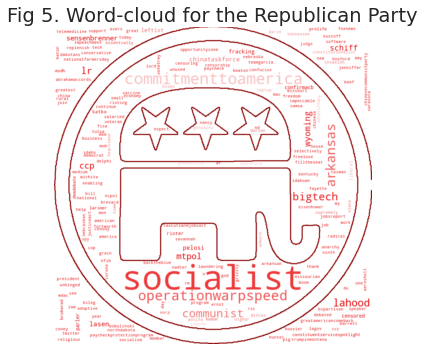

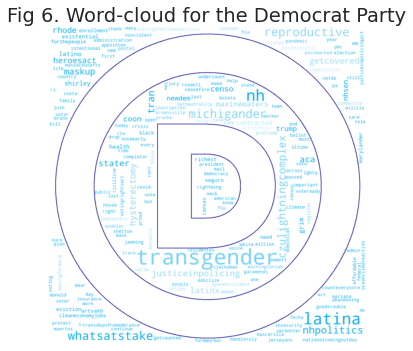

In [35]:
# plot wordclouds for each party
wordclouds_gen(string_rep, party="republican")
wordclouds_gen(string_dem, party="democrat")

**Republicans** mention words like `socialist`, `communist`, several state's names and names of representatives/ senators of both parties, like `Schiff` and `Lahood`. Also, some of the most highlighted words are `commitmenttoamerica` and `operationwarpspeed`. These are obviously some of the hashtags Republicans use quite often. *Commitment to America* was one of the Republican's campaigns \[5] and *Operation Warp Speed* is a public–private partnership initiated by the U.S. government to facilitate and accelerate the development, manufacturing, and distribution of **COVID-19** vaccines, therapeutics, and diagnostics \[6]. From the **Democrats**' side, we can see that the word `transgender` is the most highlighted word and with a big difference than the rest. This really drew our attention and after researching we found out that in the 2020 US elections a transgender senator, *Sarah McBride*, was elected for the first time \[7]. Based on this information, it is reasonable that a big number of the Democrat's representatives/ senators were posting on Twitter regarding this historical event.

### 3.2 Communities and TF-IDF analysis

In order to extract meaningfull information from our network we need we are gonna investigate our network by dividing it in **different communities** from the Democrats and Republicans **Representators** and **Senators** . 
The optimal partitions (meaning the different communities) are going to be computed with the *Louvain algorithm.* 
The corpus of the text that we are going to keep for the different communities is the Representative's and Senator's tweets, then with the merged text and the community as an entinty will be characterized with the TF-IDF method. 

Our goal here is to find whether there are distinguishable differences between the different communities of the Democrats and the Republicans.

Before applying the Louvain method, let's briefly explain how the algorithm works:

1. We start by applying every individual node in it's own community.
2. Starting with the *$i^{th}$* node, the algorithms goal is the node to be merged with another neighbor node *$j^{th}$* **only in order to optain and increase in modularity**. 
3. If there is *no increase in the modularity* for the *$i^{th}$* node, then the *$i^{th}$* node doesn't "merge" with the *$j^{th}$* node. This modularity calculation is happening for every $i$ node in the network. 

    This is the *first iteration*.


4. The *first iteration* of the algorithm runs again for every *$i^{th}$* node in the network. If there is no change in increasing of the modularity in each of the nodes in the network then algorithm *terminates*.
5. After successfuly applying the algorithm, the communities-nodes are merged as a **hypernode** so the next part of the Louvain method can be carried out. 

The method used can be seen below in the function `communities`. 

We expect that the *modularity* of those communities won't be ideal and that's fine as our network 
is a real one and carries scale-free characteristics (we will talk more about *modularity* below). 



Next, to observe the text of each community we will use the **Inverse Document Frequency (TF-IDF)** analysis. The method attaches a scoring number to words that are seen across 
the text many times but is rare in general across the whole input text. As we will se below, in the formula of TF-IDF we multiply the times a word/token appears in
the corpus **(TF)** with the Inverse Document Frequency **(TF-IDF)** for each word. 

The Inverse Document Frequency is being computed by the [following equation](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Inverse_document_frequency):

${ IDF[\text{token}] = \log \bigg [\dfrac{\text {Total number of documents}} {\text {Number of documents where the token appears}}\bigg ] } \quad  \text{or} \quad  \operatorname{idf}(t, D)=\log \dfrac{N}{|\{d \in D: t \in d\}|}$

where: 
- $N$ is the total number of documents in the corpus
- $|\{d \in D: t \in d\}|$  is the number of documents where the term d appears in the number of documents.

With the **Term-Frequency (TF)** that being computed for each token/word the community has, by using `nltk.FreqDist`, we can finally compute the **Inverse Document Frequency (TF-IDF)**
like following:

$$\operatorname{tf-idf}(t, d, D)=\operatorname{tf}(t, d) \cdot \operatorname{idf}(t, D)$$

After the theory let's inspect the code, starting with the implementation of the Louvain method below:

In [ ]:
def communities(GU, party="None"):
    largest_cc = max(nx.connected_components(GU), key=len)
    G = GU.subgraph(largest_cc)

    partition = community_louvain.best_partition(G)

    if party == "rep":
        print("The total found communities for Republicans are: "+str(max(partition.values())+1) + " and their modularity is: "+ str(community.modularity(partition, G)))
    elif party == "dem":
        print("The total found communities for Democrats are: "+str(max(partition.values())+1) + " and their modularity is: "+ str(community.modularity(partition, G)))
    else:
        print("The total found communities for the full network are: "+str(max(partition.values())+1) + " and their modularity is: "+ str(community.modularity(partition, G)))

    return partition

In [ ]:
# Republican Graph
nodes = (
    node
    for node, data in GU.nodes(data=True)
    if data.get("Party") == "Republican"
)

largest_cc = max(nx.connected_components(nx.Graph(GU.subgraph(nodes))), key=len)
GU_Republican = GU.subgraph(largest_cc)



# Demograt Graph
nodes = (
    node
    for node, data in GU.nodes(data=True)
    if data.get("Party") == "Democrat"
)

largest_cc = max(nx.connected_components(nx.Graph(GU.subgraph(nodes))), key=len)
GU_Democrat = GU.subgraph(largest_cc)


partition_total = communities(GU)
partition_rep = communities(GU_Republican, party="rep")
partition_dem = communities(GU_Democrat, party="dem")

The total found communities for the full network are: 6 and their modularity is: 0.38313881245825837
The total found communities for Republicans are: 8 and their modularity is: 0.3203487990242072
The total found communities for Democrats are: 8 and their modularity is: 0.2739511748650758


As expected, the network of the US Representatives and Senator is a real network (scale-free characteristics), judging from a modularity of $Q=0.38 $ . But what does a modularity like this mean and why it's not $Q=1$, the ideal modularity of a random network? Let's dive more into it:

While, a modularity of $Q=1$ would be ideal, fact is that real networks like this is expected to the majority of nodes with a small node degree with only certain nodes called "hubs" have the highest degrees overall (scale-free characteristics). 
Thus, as our network resembles a real one, the modularity computed by the *Louvain algorithm* is not ideal (meaning $Q=1$) in any case and that is acceptable. 
Leading to the fact that our communities `Republicans` and `Democrats` cannot be split perfectly, as well, as they carry the scale-free characterics of parent network as well.

Now, let's find the **distribution of the Democrats and Republicans communities sizes** in *histograms*: 

In [ ]:
def communities_dict(partition):
    communitiesdict = {} #create a dictionary in which we will have for each community its size and its list of representatives
    count = [] #list with the size of the communities

    for val in set(partition.values()): #loop through the unique identified communities
        chars = [] #list with the representatives in each community
        for key in partition.keys(): #loop through all the representatives
            if partition[key] == val: #if the current community is the same as the representative's community we append it to the list 
                chars.append(key)
            
        count.append(len(chars)) #count the total number of representatives in each community - the community size
    
        communitiesdict[val] = len(chars), chars #assign to the dictionary the size and the different representatives in each community

    return communitiesdict, count

In [ ]:
def community_hist(count, party): 
    if party == "rep":
        color = "red"
        title = "Distribution of Republican's community sizes"
    elif party == "dem":
        color = "steelblue"
        title = "Distribution of Democrat's community sizes"
    plt.figure(figsize = (15,8))
    plt.hist(count, bins=13, width=2, color=color)
    plt.ylabel('Number of communities')
    plt.xlabel('Bins of community sizes')
    plt.title(title)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

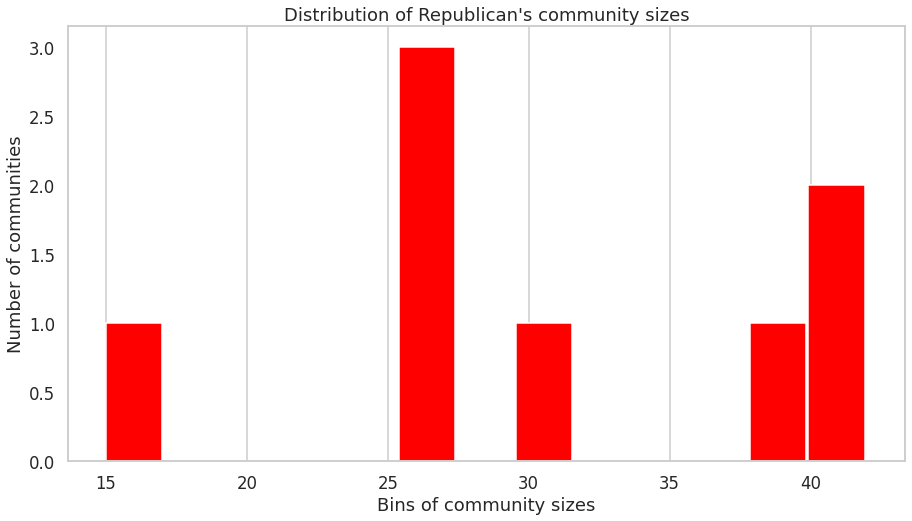

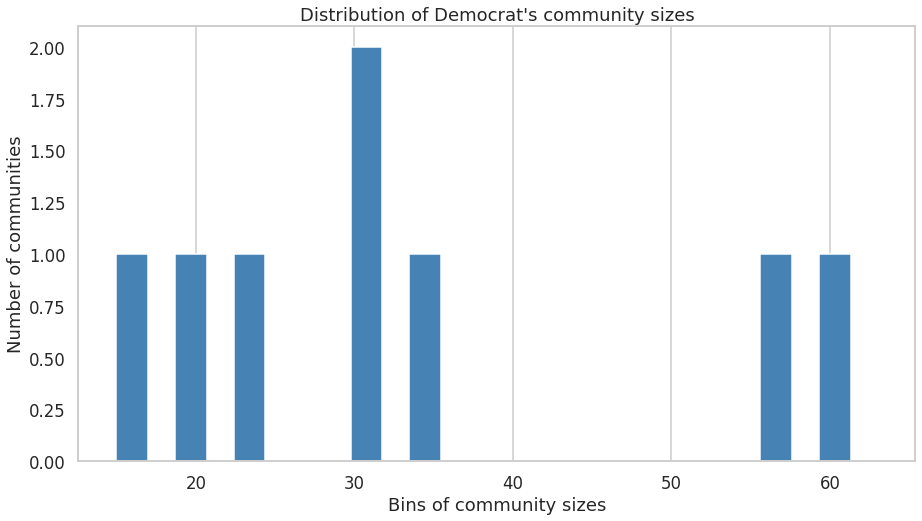

In [ ]:
communitiesdict_rep, count_rep = communities_dict(partition_rep)
communitiesdict_dem, count_dem = communities_dict(partition_dem)

community_hist(count_rep, party="rep")
community_hist(count_dem, party="dem")

Above we see a visual distribution (histogram) of the community sizes with the y-axis the number of communities with that total size (no more than 3). For both parties, the max community size is given around 40-60 Representatives and Senators. As our communities size is quite small (due to our nature of the data), on the code below we chose to work on the 4 largest communities out of the total depicted on the histogram above. Let's further analyse them:

In [ ]:
def largest_com(communities):
    communities_sorted = {k: v for k, v in sorted(communities.items(), key=lambda item: item[1], reverse=True)} #sort the dictionary based on the community size

    largestcom = {} #create dictionary for the largest communities
    c=0
    for key, value in communities_sorted.items(): #loop through the items in the sorted list
        if c < 4: #until we have filled the list with the items of the largest community 
            largestcom[key] = value
        c += 1

    return largestcom

On the function below, `fdists_tokens`, for the computation of the **Term Frequency** in each word/token to happen, the text preprocessing follows the same 
logic as described in the [subsection 3.1](#3)

In [ ]:
def fdist_tokens(largest_com, Data):
    fdist_com  = [] #list with the frequency distribution (term frequency) - the frequency of each token within each community
    tokens_com = {} #dictionary with the unique tokens each community has
    all_tokens = [] #list with all the unique tokens from all the communities

    for key, value in largest_com.items(): #loop through the largest communities
        com_name = 'community_'+str(key) #assign to a variable the community name
        tokens = [] #list which will contain the tokens of each community
        tokens_com[com_name] = {}
        for rep in value[1]:
            words = (''.join(Data[Data['TwitterUsernames'] == rep]["Tweets"])).split(' ')
            words = [w.lower() for w in words] #all characters are set to lower case
            words = [word for word in words if not word.startswith("@")]
            words = [word for word in words if not word in pun] #keep only the words which don't contain any of the listed punctuations
            words = [word for word in words if word.isalpha()] #keep the words which contain only alphabet letters
            words = [w for w in words if not w in stops] #removes the english stop words
            words = [w for w in words if not len(w) == 1] #removes the words which have length equal to 1
            for word in words: #loop through the list of words
                word = lemmatizer.lemmatize(word) #return the lemma of each word
                tokens.append(word) #new entry in the tokens list which will be used for the frequency distribution
                all_tokens.append(word) #new entry the total token list
                        
        tokens_com[com_name] = set(tokens) #add the unique list of tokens in each community
            
        fdist_com.append([com_name, nltk.FreqDist(tokens)]) #add the community and the term frequency of each token
                
    all_tokens = set(all_tokens) #keep the unique tokens

    return all_tokens, tokens_com, fdist_com

In [ ]:
def idf(tokens_com, all_tokens):
    N = len(tokens_com) #total number of communities
    idf = {} #dictionary in which we will have the IDF value for each token

    for token in all_tokens: #loop through all unique tokens
        count = 0
        for key in tokens_com.keys(): #loop through each community
            if [val for val in tokens_com[key]].count(token) > 0: #if the token appears more than once in the current community 
                count += 1 #the count value will be increased by 1
                continue
            
        idf[token] = math.log(N/count) #idf computation based on the above mentioned equation

    return idf

The **Inverse Document Frequency (IDF)** can be computed in the function `tfidf` below:

In [ ]:
def tfidf(fdist_com, idf):
    tfidf_com = {} #dictionary in which we will have the token and the tfidf
    for dist in fdist_com: #loop through each community
        tfidf_com[dist[0]] = {}
        for token in dist[1]: #loop through the tokens of the current community
            tfidf = dist[1][token] * idf[token] #calculate the tfidf
            tfidf_com[dist[0]][token] = int(round(tfidf)) #assign the rounded up to the nearest integer value

    return tfidf_com

On function `con_string` a long string is being built for each community that contains the values of the **DF-IDF scores of each token/word** is has been calculated.
We use them to calculate the **wordclouds of the different communities of the Democrats and Republicans** with the `com_figure` function below: 

In [ ]:
def com_string(tfidf_com):
    all_com = {} #dictionary which will contain the community and its long string

    for com in tfidf_com:
        all_com[com] = '' #create the community's string
        for token in tfidf_com[com]: #loop through the token's TF-IDF list values
            all_com[com] = all_com[com] + (token+' ')*tfidf_com[com][token] #add to the string the repeated tokens

    return all_com

In [ ]:
def com_figure(all_com, party):
    if party == "rep":
        mask = np.array(Image.open("./data/republican.png"))
        color = "darkred"
        title = "Republican"
    elif party == "dem":
        mask = np.array(Image.open("./data/democrat.png"))
        color = "darkblue"
        title = "Democrat"

    fig = plt.figure(figsize=(30, 10), dpi=80)
    i=1
    for community in all_com: #loop through each community
        wordcloud = WordCloud(background_color="white", mask=mask, contour_width=3, contour_color=color,
                max_font_size=3000, collocations = False)

        wordcloud.generate(all_com[community])

        image_colors = ImageColorGenerator(mask)
        plt.subplot(1, 4, i).set_title(str(community), fontsize=20)
        plt.plot()
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        i+=1
    fig.suptitle(title+"'s Word Clouds based on the TF-IDF score", fontsize=20)
    plt.show()

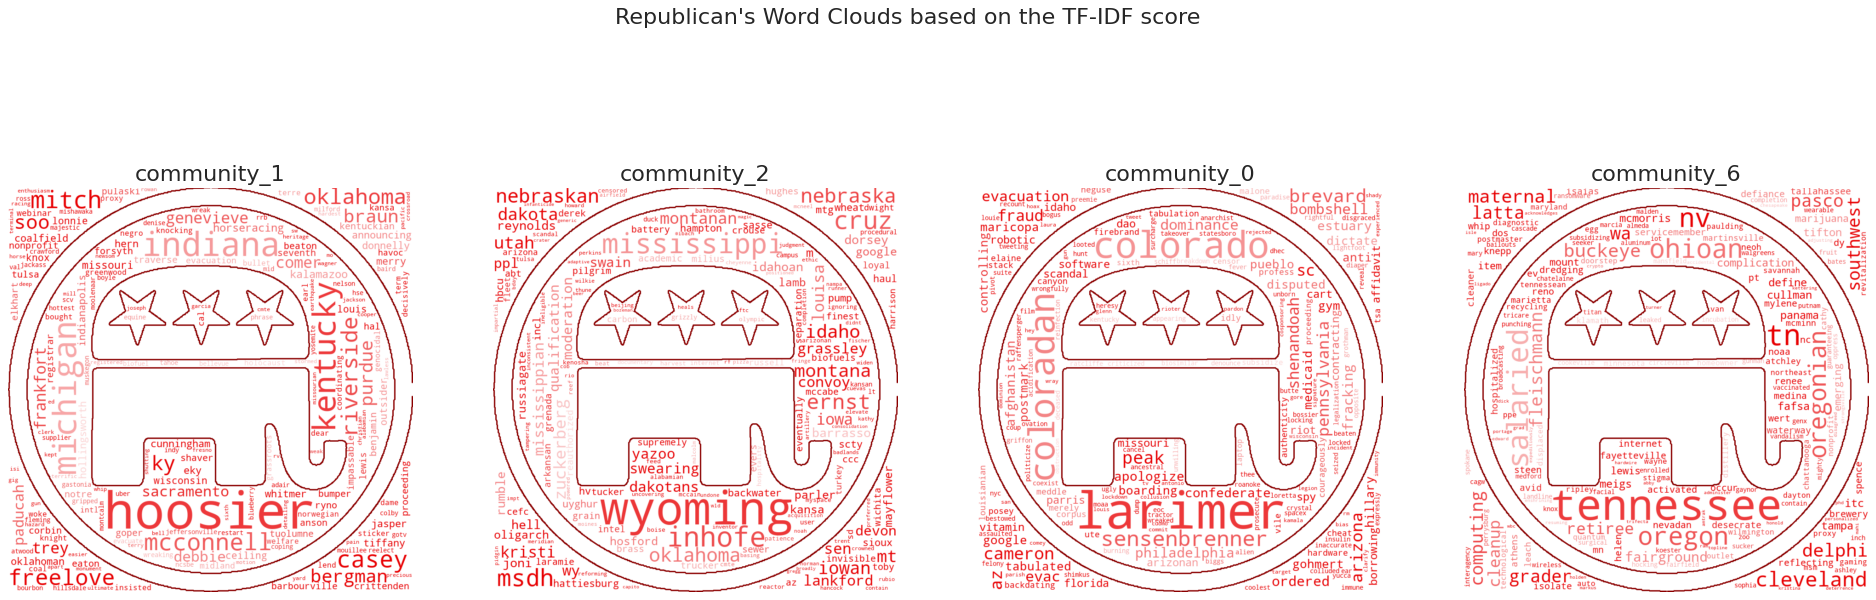

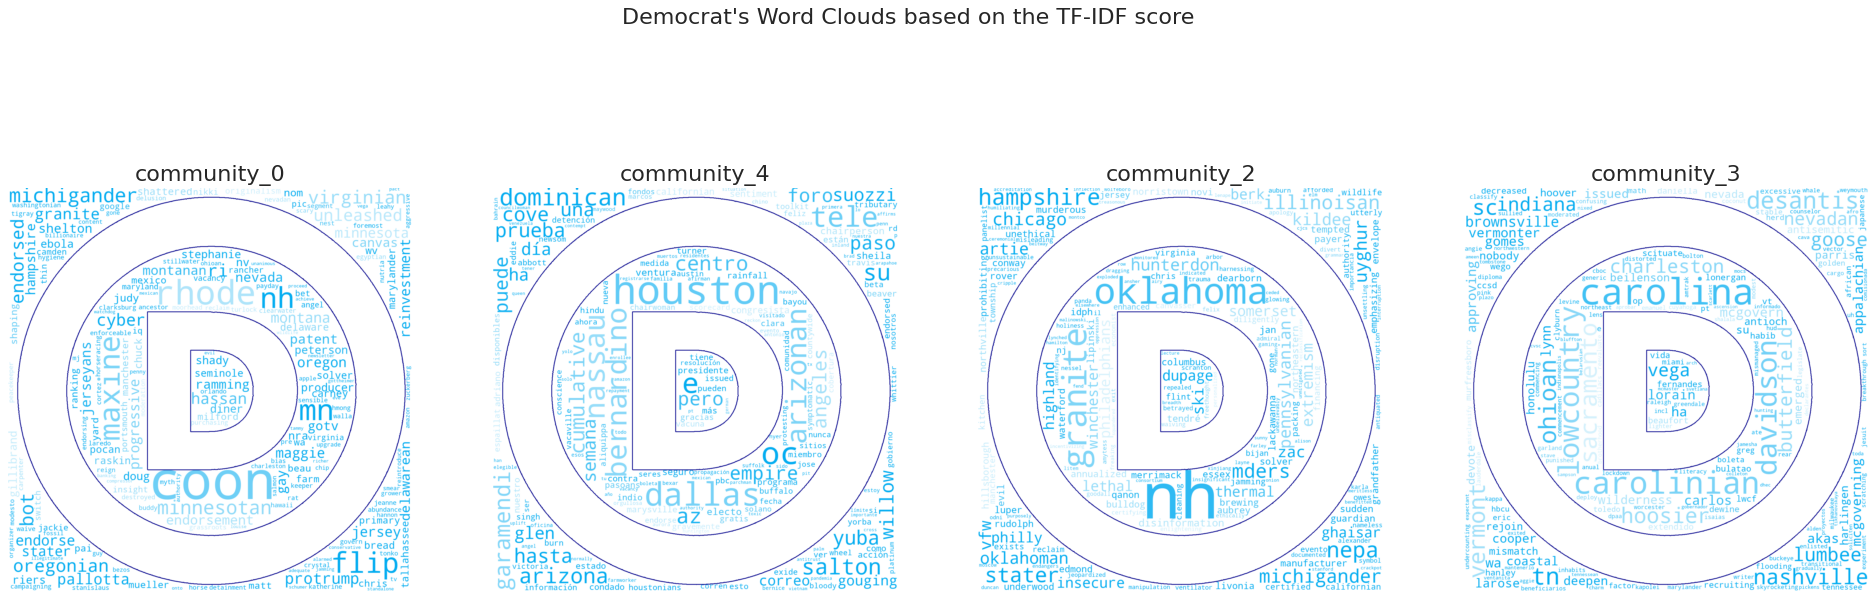

In [ ]:
largestcom_rep = largest_com(communitiesdict_rep)
largestcom_dem = largest_com(communitiesdict_dem)

alltokens_rep, tokenscom_rep, fdistcom_rep = fdist_tokens(largestcom_rep, Data)
alltokens_dem, tokenscom_dem, fdistcom_dem = fdist_tokens(largestcom_dem, Data)

idf_rep = idf(tokenscom_rep, alltokens_rep)
idf_dem = idf(tokenscom_dem, alltokens_dem)

tfidf_rep = tfidf(fdistcom_rep, idf_rep)
tfidf_dem = tfidf(fdistcom_dem, idf_dem)

comtxt_rep = com_string(tfidf_rep)
comtxt_dem = com_string(tfidf_dem)

com_figure(comtxt_rep, party="rep")
com_figure(comtxt_dem, party="dem")

**Image 1 (top):** *Republicans*' (4) communities |  **Image 2 (bottom):** *Democrats*' (4) communities 

Above we see the different 8 Wordclouds based on the different communities of the **Democrats** (4) and **Republicans** (4). (label!)

Taking a general look at the above worclouds of the different communties of the Republican and Democrats, we can extract a general idea, that most of the communities seem to specialize on different *states* and *counties*. Each community on both Republucans and Democrats seem to have a geographical distiquish between them. This leads us to the hypothesis that Representatives and Senators mostly group their political rally, their political speach, **addressing to a specific state for each and every tweet they post**.

>Let's start with the Republicans communities. 

* In **community_1** one can see the word `hoosier` and `kentucky`. Hoosier indicates the demonym of a resident at `Kentucky`. We also see `Indiana` mentioned. Geographically Kentucky and Indiana are real close to each other. Apparently, these two states we really important for the Republicans, judging from the US 2020 Elections results that were held *nominally on Tuesday, November 3, 2020*. 

[The US 2020 Election results, can be seen below:](https://www.google.com/search?q=us+election+states+results&oq=us+election+states+results&aqs=chrome.0.0i457j0l4j0i22i30l2.8728j0j1&sourceid=chrome&ie=UTF-8)

![image](./states.PNG)

Both `Kentucky` and `Indiana`, apparently were very important states for the Republicans as in these states they *took the lead against the Democrats.* On the same community (wordcloud), the name `mitch` and `mcconnel` appears also. This belongs to [Mitch McConnel](https://en.wikipedia.org/wiki/Mitch_McConnell). "Addison Mitchell McConnell Jr. is an American politician currently serving as **Kentucky's senior United States senator and as Senate majority leader**". We come to the conclution that other Republicans used his name and **reputation** when they were talking about Kentucky and Indiana to gain status and votes. 

* The **community_2** seems more broad. The top states mentioned are `Mississippi`, `Wyoming` and `Oklahoma` and the word `inhofe` that apparently belongs to [Jim Inhofe](https://en.wikipedia.org/wiki/Jim_Inhofe). "James Mountain Inhofe is an American politician serving as the senior United States Senator from *Oklahoma*". Moreover, every state mentioned in this community by the Republicans, won the US 2020 elections against the Democrats. *It makes us think that politicians knew what state the have more influence on, so they choose to talk specifically about those states.*

* In the next **community_0** we see keywords like `larimer` (county located in the U.S. state of Colorado), `colorado`, `breavard` (which is a city in North Carolina, a state that Republicans won also against the Democrats). Also the politician [Jim Sensenbrenner](https://en.wikipedia.org/wiki/Jim_Sensenbrenner), a Republican representative. There are, also, some keywords being presented in the community like `fraud` and `spy`.

* In the last Republican community, **community_6**, we see the keyword `tennessee`, a state that Republicans won with a big difference. Also, `oregon`, a state that Democrats won with more the 400k votes. we also see the city `latta` that located in North Carolona and `cleveland` (a city in Ohio, won by Republicans also).

> Let's discuss the Democrats communities.

* In the Democrat **community_0**, democrats talk about the state `Rhode` (that they eventually, won), `mn` (for Minnesota) , `Nevada` and `vigianian` that redirectes us to Virginia. `Coon` a keyword that belongs to [Chris Coons](https://en.wikipedia.org/wiki/Chris_Coons) "an American politician serving as the junior United States Senator from Delaware since 2010". Other politicians named on the community is the Democrats, [Maxine Waters](https://en.wikipedia.org/wiki/Maxine_Waters), [and Doug Jones](https://en.wikipedia.org/wiki/Doug_Jones_(politician)). There are also keywords that seem important to the public, like `gay` and `reinvestment`. Lastly, the term `protrump`, meaning Democrats were referring apparently to some oponnents as that.

* In **community_4** the states that are mentioned are: `houston`, `dallas`, `az` for Arizona, `oc` for Orange County that is located in California. There are many **more California references** like the **San Bernardino County** (`bernardino`) and the **Salton Sea** (`salton`) that is located on the southern end of the state of California. Apparently, this lake was a topic of discussion for the Democrats.

* In the **community_2** we see again the reference of different states Democrats talked about like, the **New Hampshire** (`nh`), Oklahoma, Hunterdon (`hunterdon`) a country in New Jersey and DuPage (`dupage`) a county in the Illinois. Last, this community discussed about the **Uyghurs** a Turkic ethnic group originating from Central and East Asia. Read more about Uyghurs and how Biden handles the situation here - [Uyghurs Wait Nervously for Biden China Policy As 'Genocide' Continues](https://www.newsweek.com/uyghurs-wait-nervously-biden-china-policy-genocide-continues-1553155).

* Last, in the **community_3 the talk about North Carolina continues**, with references like `carolina` and `lowcountry` for the [South Carolina Lowcountry](https://en.wikipedia.org/wiki/South_Carolina_Lowcountry), `charleston` and the tribe Lumbee (`lumbee`) that is located in North Carolina [with over 55k members](https://en.wikipedia.org/wiki/Lumbee#:~:text=The%20Lumbee%20Tribe%20is%20the,which%20winds%20through%20Robeson%20County.) There were also some discussions regarding the Vermont (`vermont`) state.

### 3.3 Core and Truss Decomposition

After the analysis we did based on the content of the Tweets and the communities of each party, we were interested in observing the *most influential* congress members. 

**Core decomposition algorithm** in networks is a fundamental operation strongly related to more complex mining tasks such as community detection, dense subgraph discovery, 
identification of *influential nodes*, network visualization, text mining, etc. There are various ways to extract the most important nodes in a Graph, like *degree centrality* and *betweenness centrality*, but core decomposition is considered a more efficient and effective method since it is less complex and computationally intensive  \[8].  

Let's consider the undirected graphs for each party, *Republican* and *Democrat*, which have
V nodes and E edges. The k-core decomposition of each graph, G(V, E), is the maximal subgraph such that each degree of the subgraph is greater or equal to the **threshold k**. So k is assigned on the degree of each node and the nodes that don't satisfy the threshold, are excluded from
the process.   

To extract the most influential members of the congress with the core decomposition algorithm, we used the `networkx.k_core` function.

**Truss decomposition algorithm**  compared to k-core represents the “core” of a k-core
that keeps the key information while filtering out less important information from the k-core. 

The definition of k-truss is that given the subgraphs for each party,  G, the k-truss of it is the largest subgraph
in which every edge is contained in at least (k−2) triangles within the subgraph. The problem of truss decomposition in G
is to find the non-empty k-trusses of G for all k. k-trusses are hierarchical subgraphs that represent the cores of a network at different levels of granularity. \[9]

For the specific algorithm we used the `networkx.k_truss` function.

Below both implementation are presented, we will analyze their results and compare them. The basic steps are the following:
* For each party we run, first, the `k_core` and, then, the `k_truss` algorithms. The results will be presented in a graph.
* Based on the extracted nodes we set the *color* settings for the graph
* The size of the nodes is set based on their degree, in order to identify the differences betweetn the degrees and the k_cores/ k_trusses.
* For the visualization we used the Force Atlas 2 algorithm.

In [ ]:
# core and truss decomposition for Republican's graph
def decomposition_republican(GU_Republican, core=False, truss=False):
    if core:
        nodes = nx.k_core(GU_Republican, k=9).nodes()
    elif truss:
        nodes = nx.k_truss(GU_Republican, k=7).nodes()

    node_color = []
    for node in GU_Republican.nodes():
        if node in nodes:
            node_color.append("yellow")
        else:
            node_color.append("red")

    d = nx.degree(GU_Republican)
    sizes = [(d[node] + 1) * 5 for node in GU_Republican.nodes()]

    # Specify the settings for the Force Atlas 2 algorithm
    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        linLogMode=False,  # NOT IMPLEMENTED
        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
        edgeWeightInfluence=1.0,

        # Performance
        jitterTolerance=1.0,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=1.2,
        multiThreaded=False,  # NOT IMPLEMENTED

        # Tuning
        scalingRatio=2.0,
        strongGravityMode=False,
        gravity=5.0,

        # Log
        verbose=True)

    positions = forceatlas2.forceatlas2_networkx_layout(GU, pos=None, iterations=2000)

    plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')

    sns.set_style('whitegrid')
    sns.set_context('talk')

    # create legend
    plt.scatter([], [], c='yellow', alpha=0.7, s=100, label='Most Influential Republicans')
    plt.legend(scatterpoints=1, frameon=True, labelspacing=1)

    nx.draw_networkx_nodes(GU_Republican, positions, node_size=sizes, node_color=node_color, alpha=0.7)
    nx.draw_networkx_edges(GU_Republican, positions, edge_color="grey", alpha=0.08)
    ax = plt.gca()
    ax.collections[0].set_linewidth(0.1)
    ax.set_title('US House Republican Representatives of 2020 network', fontsize=16);
    plt.axis('off')
    plt.show()

    if truss:
        return nodes

In [ ]:
# core and truss decomposition for Democrat's graph
def decomposition_democrat(GU_Democrat, core=False, truss=False):
    if core:
        nodes = nx.k_core(GU_Democrat, k=12).nodes()
    elif truss:
        nodes = nx.k_truss(GU_Democrat, k=6).nodes()

    node_color = []
    for node in GU_Democrat.nodes():
        if node in nodes:
            node_color.append("yellow")
        else:
            node_color.append("blue")

    d = nx.degree(GU_Democrat)
    sizes = [(d[node] + 1) * 5 for node in GU_Democrat.nodes()]

    # Specify the settings for the Force Atlas 2 algorithm
    forceatlas2 = ForceAtlas2(
        # Behavior alternatives
        outboundAttractionDistribution=True,  # Dissuade hubs
        linLogMode=False,  # NOT IMPLEMENTED
        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
        edgeWeightInfluence=1.0,

        # Performance
        jitterTolerance=1.0,  # Tolerance
        barnesHutOptimize=True,
        barnesHutTheta=1.2,
        multiThreaded=False,  # NOT IMPLEMENTED

        # Tuning
        scalingRatio=2.0,
        strongGravityMode=False,
        gravity=5.0,

        # Log
        verbose=True)

    positions = forceatlas2.forceatlas2_networkx_layout(GU, pos=None, iterations=2000)

    plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')

    sns.set_style('whitegrid')
    sns.set_context('talk')

    # create legend
    plt.scatter([], [], c='yellow', alpha=0.7, s=100, label='Most Influential Democrats')
    plt.legend(scatterpoints=1, frameon=True, labelspacing=1)

    nx.draw_networkx_nodes(GU_Democrat, positions, node_size=sizes, node_color=node_color, alpha=0.7)
    nx.draw_networkx_edges(GU_Democrat, positions, edge_color="grey", alpha=0.08)
    ax = plt.gca()
    ax.collections[0].set_linewidth(0.1)
    ax.set_title('US House Democrat Representatives of 2020 network', fontsize=16);
    plt.axis('off')
    plt.show()

    if truss:
        return nodes

100%|██████████| 2000/2000 [00:05<00:00, 357.83it/s]
BarnesHut Approximation  took  1.72  seconds
Repulsion forces  took  3.17  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.15  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


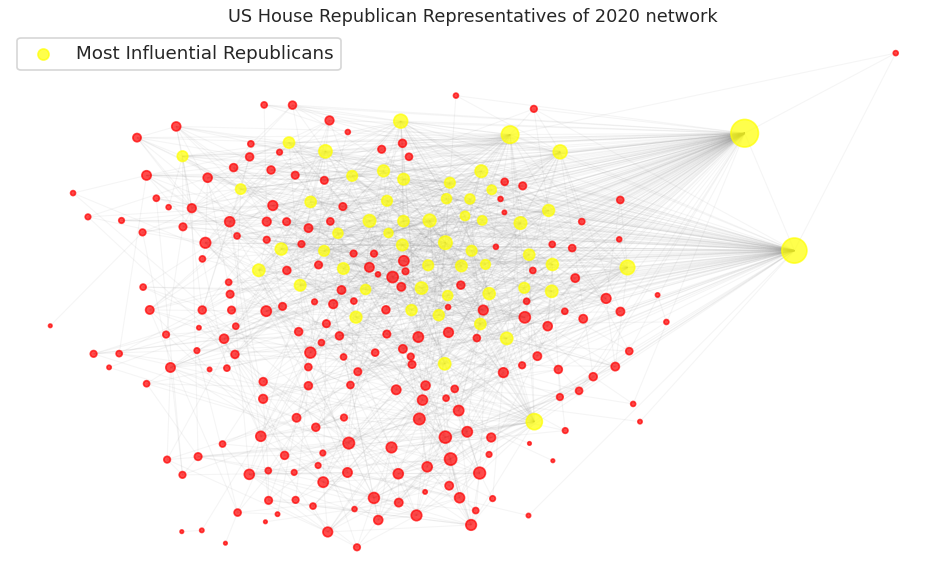

100%|██████████| 2000/2000 [00:05<00:00, 345.26it/s]
BarnesHut Approximation  took  1.81  seconds
Repulsion forces  took  3.31  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.22  seconds


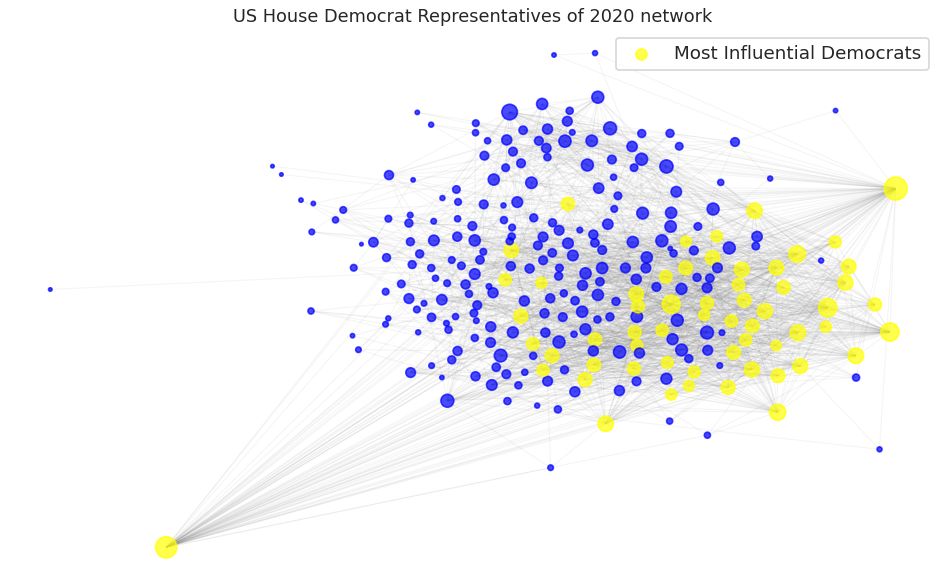

In [ ]:
# plot graphs for core decomposition
decomposition_republican(GU_Republican, core=True)
decomposition_democrat(GU_Democrat, core=True)

For both parties, **Republican** (9-cores) and **Democrat** (12-cores), we can clearly see that there a lot of high degree nodes (representatives) which are not considered as the "core" of the networks, and therefore as the *most influential* members of the party. **K-core decomposition algorithm** manages to clarify effectively the importance between the nodes (representatives).

100%|██████████| 2000/2000 [00:05<00:00, 342.54it/s]
BarnesHut Approximation  took  1.85  seconds
Repulsion forces  took  3.32  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


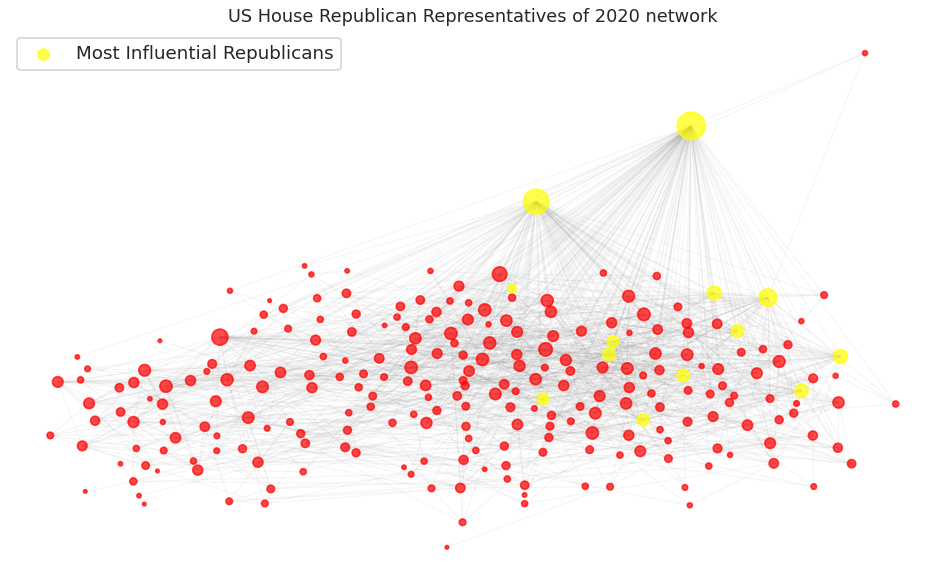

+------------------------------+
| Most Influential Republicans |
+------------------------------+
|        RepRichHudson         |
|          MacTXPress          |
|       michaelcburgess        |
|           boblatta           |
|         ConawayTX11          |
|          GOPLeader           |
|         SteveScalise         |
|        cathymcmorris         |
|          RepMcCaul           |
|         RepTomEmmer          |
|        RepKevinBrady         |
|         RepRonWright         |
|       RepBradWenstrup        |
+------------------------------+


In [ ]:
# plot graphs and lists for truss decomposition
truss_nodes_r = decomposition_republican(GU_Republican, truss=True)

pt = prettytable.PrettyTable()
pt.add_column('Most Influential Republicans', list(truss_nodes_r.keys()))
print(pt)

100%|██████████| 2000/2000 [00:05<00:00, 349.04it/s]
BarnesHut Approximation  took  1.82  seconds
Repulsion forces  took  3.24  seconds
Gravitational forces  took  0.04  seconds
Attraction forces  took  0.14  seconds
AdjustSpeedAndApplyForces step  took  0.23  seconds


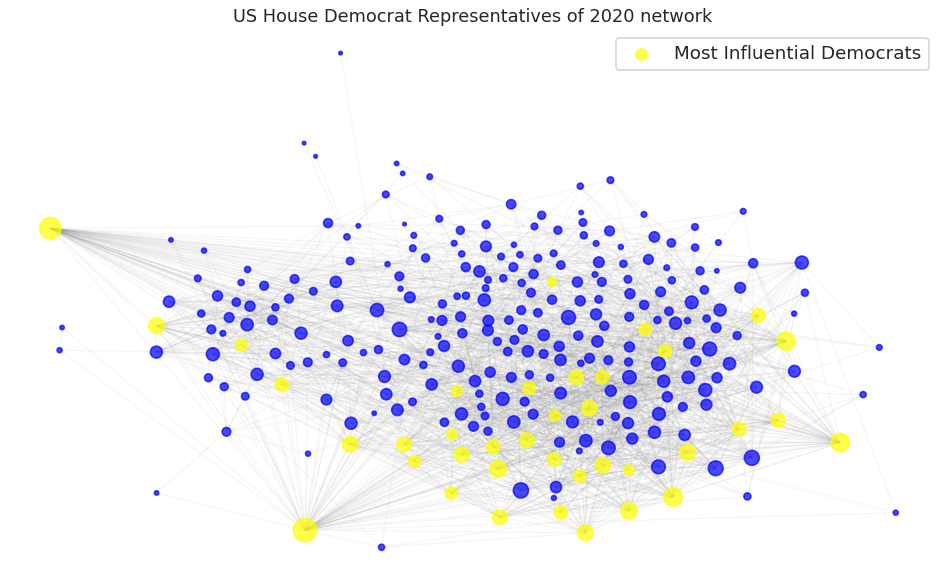

+----------------------------+
| Most Influential Democrats |
+----------------------------+
|        KamalaHarris        |
|       SpeakerPelosi        |
|      BennieGThompson       |
|        RepMcGovern         |
|       RepBarbaraLee        |
|        NormaJTorres        |
|        RepSusanWild        |
|      RepRaulGrijalva       |
|       RepChuyGarcia        |
|        RepPressley         |
|        repmarkpocan        |
|         RepMaloney         |
|        WhipClyburn         |
|        LeaderHoyer         |
|       SenatorDurbin        |
|         SenSchumer         |
|       SenatorBaldwin       |
|          RepDean           |
|           RepMGS           |
|        RepDonBeyer         |
|         RepKClark          |
|       GerryConnolly        |
|      JoaquinCastrotx       |
|      RepAnthonyBrown       |
|       RepDwightEvans       |
|         RepCasten          |
|         NitaLowey          |
|         RepSpeier          |
|       janschakowsky        |
|       

In [ ]:
truss_nodes_d = decomposition_democrat(GU_Democrat, truss=True)

pt = prettytable.PrettyTable()
pt.add_column('Most Influential Democrats', list(truss_nodes_d.keys()))
print(pt)

Starting from the **Republicans**, the extracted graph based on the 7-trusses is much better filtered and it is more direct who the most influential representatives are. Also, part of the *Most Influential Republicans* list is the leader of the Republican Party, *Kevin McCarthy*. 

**Democrats** graph shows that their party consists of much more influential members rather than the Republicans. This could be explained since the Democrats congress members are more, 280 than 247, but this difference is not so big in order to justify that the Democrat party has 3 times more influential members. 

Again we can see that the leader of the party is one of the *Most Influential Democrats*.

*It would be intresting to further investigate any patterns between the most influential members of each party and the number of followers or tweets each account has*.

### 3.4  Analysis of communities and most influential

But how the extracted communities for each party connect with the most influential members? This section aims on visualizing the different communities of each party by considering the influence each member has, based on the analysis in section 3.3. Also, we will explore possible patterns between the content of the influential's Tweets and the communities they belong.

#### 3.4.1 Combining communities with k-truss influential nodes

Below we have the implementation needed to *visualize the different communities* in order to **distinguish them** and the *influential members* of the US congress. 

The steps to plot the communities in the right position so that the various communities are distinguished are the following:
* We have to create a new weighted graph, in which each node corresponds to a community, and the weights correspond to the number of edges between communities. In this way we can position the communities with respect to each other.
* Continuing, we have to position the nodes in the community they belong and in order to do that for each community we create a new graph.
* By combining the above steps, we get the final result with the correct positions for the communities and their nodes.

In [ ]:
# Source: https://stackoverflow.com/questions/43541376/how-to-draw-communities-with-networkx
def community_layout(g, partition):
    """
    Compute the layout for a modular graph.


    Arguments:
    ----------
    g -- networkx.Graph or networkx.DiGraph instance
        graph to plot

    partition -- dict mapping int node -> int community
        graph partitions


    Returns:
    --------
    pos -- dict mapping int node -> (float x, float y)
        node positions

    """

    pos_communities = _position_communities(g, partition, scale=3.)

    pos_nodes = _position_nodes(g, partition, scale=1.)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos


def _position_communities(g, partition, **kwargs):
    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(partition.values())
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)
    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, **kwargs)

    # set node positions to position of community
    pos = dict()
    for node, community in partition.items():
        pos[node] = pos_communities[community]

    return pos


def _find_between_community_edges(g, partition):
    edges = dict()

    for (ni, nj) in g.edges():
        ci = partition[ni]
        cj = partition[nj]

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges


def _position_nodes(g, partition, **kwargs):
    """
    Positions nodes within communities.
    """

    communities = dict()
    for node, community in partition.items():
        try:
            communities[community] += [node]
        except KeyError:
            communities[community] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, **kwargs)
        pos.update(pos_subgraph)

    return pos

In [ ]:
def influential_com(GU, partition, truss_nodes, p):
    nodes = []
    for node in GU.nodes():
        if node not in truss_nodes:
            nodes.append(node)

    node_color = []
    for key, value in partition.items():
        if key not in truss_nodes:
            node_color.append(value)

    pos = community_layout(GU, partition)

    node_pos = {}
    truss_pos = {}
    for key, value in pos.items():
        if key in truss_nodes:
            truss_pos[key] = value
        else:
            node_pos[key] = value

    plt.figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
    nx.draw_networkx_nodes(GU, node_pos, node_size=400, node_shape="o", cmap=plt.cm.RdYlBu, nodelist=nodes, node_color=node_color, alpha=0.8)
    nx.draw_networkx_nodes(GU, truss_pos, node_size=800, node_shape="*", node_color="black", nodelist=truss_nodes, alpha=0.8)
    nx.draw_networkx_edges(GU, pos, alpha=0.2, edge_color="grey")
    plt.axis('off')
    plt.show()

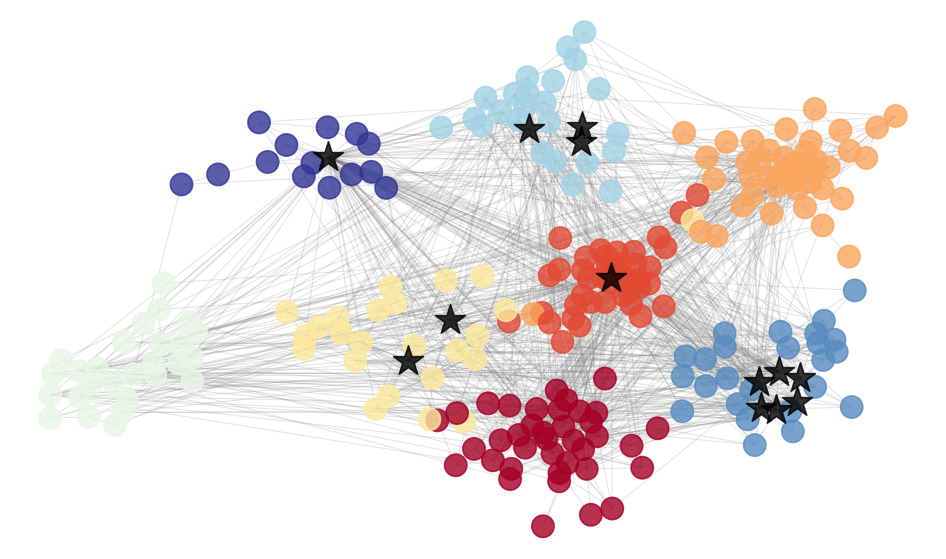

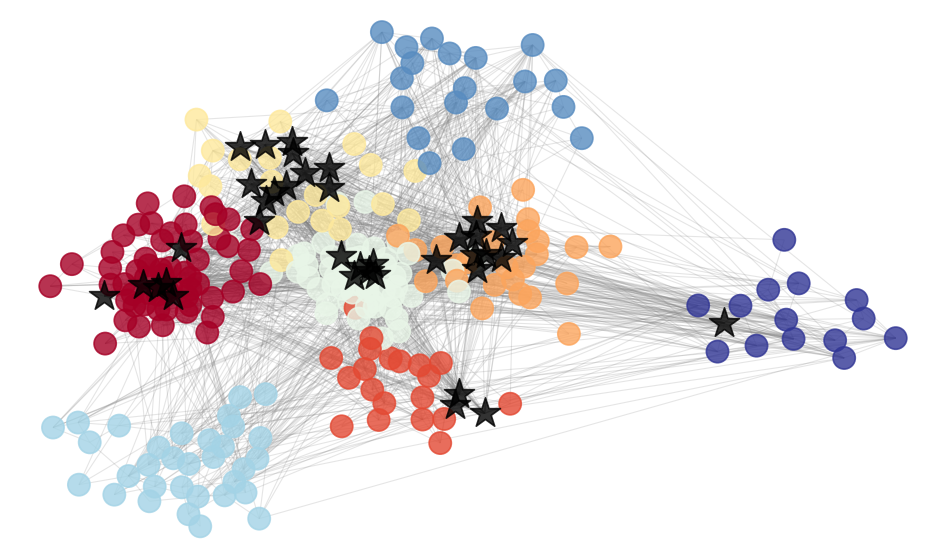

In [ ]:
influential_com(GU_Republican, partition_rep, truss_nodes_r, p="r")
influential_com(GU_Democrat, partition_dem, truss_nodes_d, p="d")

**Image 1:** *Republicans*' communities with their most influential members  |  **Image 2:** *Democrats*' communities with their most influential members 

As expected almost all of the communities each party has contain some of the most influentials representatives/ senators.

As we can see in the 2nd image, the Democrats' graph, and given the fact that they have 3 times more influential members (section 3.3), we can understand that Democrat's **retweet each other tweets and mention much more** and most of their communities follow their "leaders". 

Given this analysis and the analysis from *Section 3.3*, we can assume that Democrats have created a **stronger social network** through Twitter and, also, based on Twitter's power in the social media world we can find a connection between their higher elected number of congress members and their "attitude" in the *Twitter "world"*.

#### 3.4.2 Word Clouds of top candidates and their communities

To investigate and analyse the top candidates and best influencers between the 2020 US Representators and Senators, we'll consider one Democrat representative and one Republican with the most influence *based on our analysis above* and we will investigate any common patterns in their Tweets. 

From the previous presented lists we chose to select the following representatives and leaders of Democrats and Republicans  that are **the leaders of House**. These are respectively:

* The Speaker of the United States House of Representatives - Democrat **Nancy Pelosi** of California - *Democrat Party* | @SpeakerPelosi
* House Republican Leader - Congressman **Kevin McCarthy** of California - *Republican Party* | @GOPLeader

We want to have better insight regarding the above representatives. *We are going to make 2 groups of wordclouds*. One for the specific representers and one for their community they belong to.

Our goal is to understand whether the two leaders share a common way of saying patterns, meaning using common words and how they differentiate from their community. After the block of code below, let's take a look at the leader's wordclouds:

In [ ]:
def fdist_tokens_inf(candidates, Data):
    fdist  = [] #list with the frequency distribution (term frequency) - the frequency of each token within each community
    tokens = {} #dictionary with the unique tokens each community has
    all_tokens = [] #list with all the unique tokens from all the communities

    for candidate in candidates:
        toks = [] #list which will contain the tokens of each community
        tokens[candidate] = {}
        words = (''.join(Data[Data['TwitterUsernames'] == candidate]["Tweets"])).split(' ')
        words = [w.lower() for w in words] #all characters are set to lower case
        words = [word for word in words if not word.startswith("@")]
        words = [word for word in words if not word in pun] #keep only the words which don't contain any of the listed punctuations
        words = [word for word in words if word.isalpha()] #keep the words which contain only alphabet letters
        words = [w for w in words if not w in stops] #removes the english stop words
        words = [w for w in words if not len(w) == 1] #removes the words which have length equal to 1
        for word in words: #loop through the list of words
            word = lemmatizer.lemmatize(word) #return the lemma of each word
            toks.append(word) #new entry in the tokens list which will be used for the frequency distribution
            all_tokens.append(word) #new entry the total token list
                    
        tokens[candidate] = set(toks) #add the unique list of tokens in each community
        
        fdist.append([candidate, nltk.FreqDist(toks)]) #add the community and the term frequency of each token
            
    all_tokens = set(all_tokens)

    return all_tokens, tokens, fdist

In [ ]:
def graph_inf_wordcloud(fdist, idf_inf, candidates): 
    tfidf_inf = {} #dictionary in which we will have the token and the tfidf
    for d in fdist: #loop through each community
        tfidf_inf[d[0]] = {}
        for token in d[1]: #loop through the tokens of the current community
            tfidfx = d[1][token] * idf_inf[token] #calculate the tfidf
            tfidf_inf[d[0]][token] = int(round(tfidfx)) #assign the rounded up to the nearest integer value

    full_txt = com_string(tfidf_inf)

    mask = [np.array(Image.open("./data/republican.png")), np.array(Image.open("./data/democrat.png"))]
    color = ["darkred", "darkblue"]

    fig = plt.figure(figsize=(30, 10), dpi=80)
    i=1
    for j, candidate in enumerate(candidates): #loop through each community
        wordcloud = WordCloud(background_color="white", mask=mask[j], contour_width=3, contour_color=color[j],
                    max_font_size=3000, collocations = False)

        wordcloud.generate(full_txt[candidate])

        image_colors = ImageColorGenerator(mask[j])
        plt.subplot(1, 2, i).set_title(str(candidate), fontsize=20)
        plt.plot()
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        i+=1
    fig.suptitle("Word Clouds based on the TF-IDF score of the most Influential Representatives", fontsize=20)
    plt.show()

In [ ]:
candidates = ['GOPLeader', 'SpeakerPelosi']

alltokens_inf, tokens_inf, fdist_inf = fdist_tokens_inf(candidates, Data)
idf_inf = idf(tokens_inf, alltokens_inf)

In [ ]:
for key,value in partition_rep.items():
    if key == candidates[0]:
        community_rep = value
        print(f"Republican {key} belongs to the community {value}\n")
  
for key,value in partition_dem.items():
    if key == candidates[1]:
        community_dem = value
        print(f"Democrat {key} belongs to the community {value}")

Republican GOPLeader belongs to the community 1

Democrat SpeakerPelosi belongs to the community 2


Now let's make a dictionary of the community of the two politicians that belong to, *without them* in order to analyse more about the community they belong to.

In [ ]:
Republicans_com = []
Democrats_com = []

for key, value in partition_dem.items():
    if value == community_dem: #change this according to the communities our members belong to 
        if key != 'SpeakerPelosi':
            Democrats_com.append(key)

for key, value in partition_rep.items():
    if value == community_rep: #change this according to the communities our members belong to
        if key != 'GOPLeader':
            Republicans_com.append(key)

makedict = {}    
makedict = {
    '0' : Democrats_com,
    '1' : Republicans_com
}

In [ ]:
def fdist_tokens_com(dictionary, Data): #rep_com, candidate
    fdist_com  = [] #list with the frequency distribution (term frequency) - the frequency of each token within each community
    tokens_com = {} #dictionary with the unique tokens each community has
    all_tokens = [] #list with all the unique tokens from all the communities

    tokens = []
    for i in list(dictionary.values())[0]: #loop through the largest communities
        com_name = 'community_0_dem' #assign to a variable the community name
        tokens_com[com_name] = {}
        words = (''.join(Data[Data['TwitterUsernames'] == i]["Tweets"])).split(' ')
        words = [w.lower() for w in words] #all characters are set to lower case
        words = [word for word in words if not word.startswith("@")]
        words = [word for word in words if not word in pun] #keep only the words which don't contain any of the listed punctuations
        words = [word for word in words if word.isalpha()] #keep the words which contain only alphabet letters
        words = [w for w in words if not w in stops] #removes the english stop words
        words = [w for w in words if not len(w) == 1] #removes the words which have length equal to 1
        for word in words: #loop through the list of words
            word = lemmatizer.lemmatize(word) #return the lemma of each word
            tokens.append(word) #new entry in the tokens list which will be used for the frequency distribution
            all_tokens.append(word) #new entry the total token list
                                
        tokens_com[com_name] = set(tokens) #add the unique list of tokens in each community        
        fdist_com.append([com_name, nltk.FreqDist(tokens)]) #add the community and the term frequency of each token

    tokens = [] #list which will contain the tokens of each community
    for i in list(dictionary.values())[1]: #loop through the largest communities
        com_name = 'community_0_rep' #assign to a variable the community name
        tokens_com[com_name] = {}
        words = (''.join(Data[Data['TwitterUsernames'] == i]["Tweets"])).split(' ')
        words = [w.lower() for w in words] #all characters are set to lower case
        words = [word for word in words if not word.startswith("@")]
        words = [word for word in words if not word in pun] #keep only the words which don't contain any of the listed punctuations
        words = [word for word in words if word.isalpha()] #keep the words which contain only alphabet letters
        words = [w for w in words if not w in stops] #removes the english stop words
        words = [w for w in words if not len(w) == 1] #removes the words which have length equal to 1
        for word in words: #loop through the list of words
            word = lemmatizer.lemmatize(word) #return the lemma of each word
            tokens.append(word) #new entry in the tokens list which will be used for the frequency distribution
            all_tokens.append(word) #new entry the total token list
                                
        tokens_com[com_name] = set(tokens) #add the unique list of tokens in each community        
        fdist_com.append([com_name, nltk.FreqDist(tokens)]) #add the community and the term frequency of each token    

    all_tokens = set(all_tokens) #keep the unique tokens
    
    return all_tokens, tokens_com, fdist_com

In [ ]:
def graph_wout_inf_wordcloud(fulltxt_c):
    mask = [np.array(Image.open("./data/republican.png")), np.array(Image.open("./data/democrat.png"))]

    fig = plt.figure(figsize=(30, 10), dpi=80)
    for community in fulltxt_c: #loop through each community
        if community == 'community_0_rep':
            wordcloud = WordCloud(background_color="white", mask=mask[0], contour_width=3, contour_color='darkred',
                        max_font_size=3000, collocations = False).generate(fulltxt_c[community])

            image_colors = ImageColorGenerator(mask[0])
            plt.subplot(1, 2, 1).set_title("...", fontsize=20)
            plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
            plt.axis("off")
        else:
            wordcloud = WordCloud(background_color="white", mask=mask[1], contour_width=3, contour_color='darkblue',
                        max_font_size=3000, collocations = False).generate(fulltxt_c[community])

            image_colors = ImageColorGenerator(mask[1])
            plt.subplot(1, 2, 2).set_title("...", fontsize=20)
            plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
            plt.axis("off")
            
    fig.suptitle("Word Clouds based on the TF-IDF score of the communities of most Influential Representatives", fontsize=20)
    plt.show()


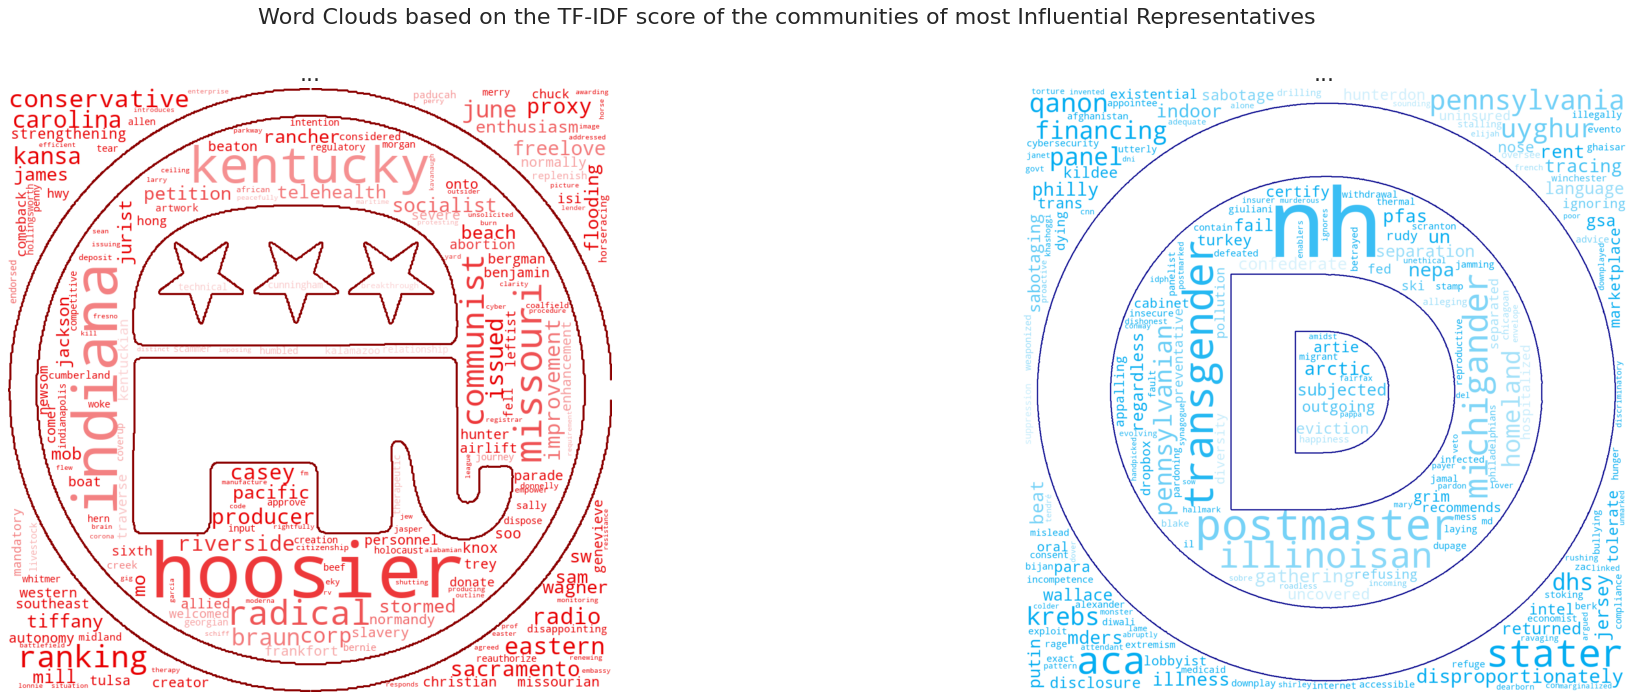

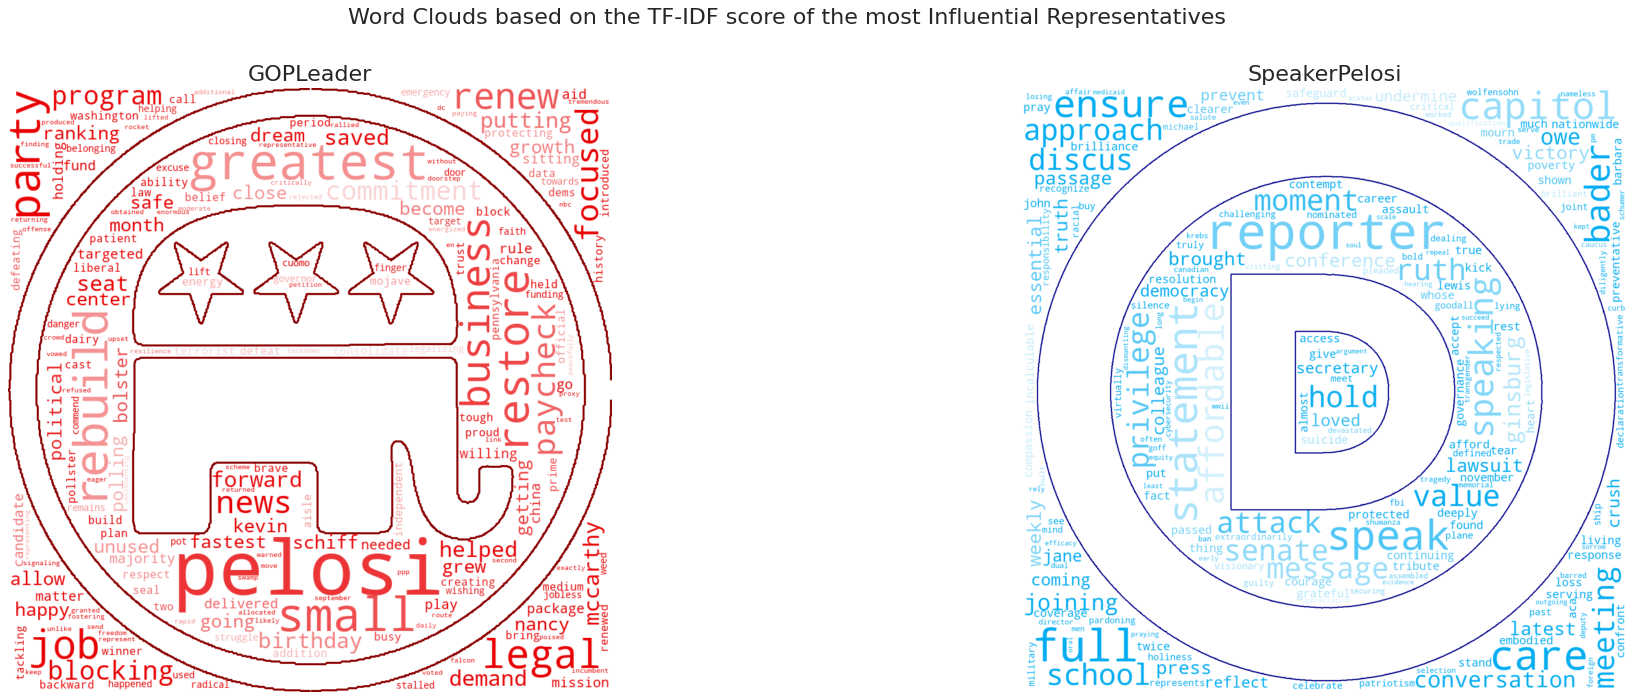

In [ ]:
alltoks_c, toks_c, fdist_c = fdist_tokens_com(makedict, Data)

idf_c = idf(toks_c, alltoks_c)

tfidf_c = tfidf(fdist_c, idf_c)

fulltxt_c = com_string(tfidf_c)


graph_wout_inf_wordcloud(fulltxt_c)
graph_inf_wordcloud(fdist_inf, idf_inf, candidates)

**Image 1 (top):** *Republicans and Democrats*' communities of their most influential Representatives | **Image 2 (bottom):** *Kevin McCarthy vs Nancy Pelosi*

Let's start with the Republican's influencer and leader **Congressman Kevin McCarthy | @GOPLeader** and his community (without the reported):
* **Kevin McCarthy** - Congressman Kevin McCarthy seems to address to `Pelosi` (the Speaker of the US House of Representatives) constantly as it is the most common word of McCarthy. He seems to use specific kind of vocabulary with keywords like `greatest`, `business`, `restore`, `dream`, `legal`, `mission`, `job` and `paycheck`. Based on that we believe Kevin McCarthy uses his twitter to oppose (mainly) with **Nancy Pelosi** and address specific issues with empasys on ethics and "words that make a positive impression".

* **Kevin's community** - The community that Kevin McCarthy belongs to, seem to speak mainly about other states based on `kentucky`, `indiana` and `missouri`. Exactly what is exprected seing all other Republicans communities on section 3.2.

* **Nancy Pelosi** - The Speaker of the United States House of Representatives seems to use her Twitter account, not to directly speak and play in political discussions and debates as her keywords are much more general than **Kevin McCarthy** with keywords like `statement`, `priviledge`, `democracy`, `ensure`, `value`, `care`, `school` and `bader` addressing to the recent death of [Ruth Bader Ginsburg](https://en.wikipedia.org/wiki/Ruth_Bader_Ginsburg), an associate justice of the Supreme Court of the United States from 1993 until her **recent death on September 18, 2020**. In general, Nancy Pelosi also uses words with positive impact like Kevin McCarthy does but she seems less "aggresive" by her terminology.

* **Nancy's community** - The community that Nancy Pelosi belongs to, spoke a lot about the transgender senator, Sarah McBride, that was elected for the first time[7]. This must have been an important event for the party. As shown on the section 3.2 in the Democrats' communities, we also see different states being mentioned with a big focus on `nh` for New Hampshire. The term `michigander` is an unofficial demonym for natives and residents of the U.S. state of `Michigan` and `pennysilvania`. 

Regarding politicians, in conclution, we see a certain interest in politicians tweets. They mention mostly the states they have the most influence on.

### 3.5 Partisanship and sentiment Analysis

**Goal:**

Our first point of interest is going to be partisanship. First, we need to definie what it is, especially in a biparty system such as the US and how to measure it. 
We will consider partisanship to be commitment to one's party line, and oppose it mostly to centrism as well as  to a lesser extent the radical wing of one's party. \
We will then use this metric to assess members of Congress (MOC) individually and then by state to see  for example  how partisan Southern Democrats are. In fact, many of them switched to the Republican Party in the second half of the 20th  century and we would like to know if the remaining ones are also close to the Republicans or instead became  more left-wing, as the compromising ones had left. 
 <br/><br/>

**How ?** 

Based on our previous definition,  words can be considered partisan if there is a sizable difference in frequencies between the two parties. It is exactly what TF-TR measures so we will use it again but this time with a bigger constant as we want to give more weight to frequencies compared to ratios for the scoring not to favor radicalism too much.\
Similarly to the previous part, we will start by tokenizing the tweets of each MOC, concatenate them based on party then apply TF-TR to those two documents.
Then we will use the scores of the TF-TR to grade each MOC's tweets.



In [ ]:
Data['Name']=Data['Name'].apply(lambda x: x.lower().replace(',','')) # we unify the various names presentations so it is easier to query
#A list of all US states and a  dictionnary to go from state to code , both used for plotting on a US map later

StateList=['Alaska','Hawaii','Minnesota', 'Montana', 'North Dakota','Idaho','Washington','Arizona','California','Colorado','Nevada','New Mexico','Oregon','Utah','Wyoming','Arkansas','Iowa','Kansas','Missouri','Nebraska','Oklahoma','South Dakota','Louisiana','Texas','Connecticut','Massachusetts','New Hampshire','Rhode Island','Vermont','Alabama','Florida','Georgia','Mississippi','South Carolina','Illinois','Indiana','Kentucky','North Carolina','Ohio','Tennessee','Virginia','Wisconsin','West Virginia','Delaware','District of Columbia','Maryland','New Jersey','New York','Pennsylvania','Maine','Michigan']

us_state_abbrev = {'Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC','Florida': 'FL','Georgia': 'GA','Guam': 'GU','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

In [ ]:
dfRep=Data[Data['Party']=='Republican'].copy()
dfDem=Data[Data['Party']=='Democrat'].copy()
len(dfDem)+len(dfRep),len(Data)

(537, 537)

In [ ]:
RepTokens=cleaned_republican_text
DemTokens=cleaned_democrat_text

DemFreq=dict(nltk.FreqDist(DemTokens))   # computes the tokens frequency
RepFreq=dict(nltk.FreqDist(RepTokens))


WordCountDem=pd.DataFrame(columns=['Word','Count'])
WordCountDem.astype({'Word':'category'})
WordCountRep=pd.DataFrame(columns=['Word','Count'])
WordCountRep.astype({'Word':'category'})

for word,count in DemFreq.items():
    WordCountDem.loc[len(WordCountDem)+1]=(word,count)
for word,count in RepFreq.items():
    WordCountRep.loc[len(WordCountRep)+1]=(word,count)


WordCountRep=WordCountRep.set_index('Word')
WordCountDem=WordCountDem.set_index('Word')
WordCountDict=WordCountDem.to_dict()
WordCountDict2=WordCountRep.to_dict()
WordCountDict2=WordCountDict2['Count']
WordCountDict=WordCountDict['Count']


#TF-TR computation 

tftr_Dem = {} 

for word in WordCountDict:
    if word in WordCountDict2:
        tr= WordCountDict[word]/(WordCountDict2[word]+10)  # a small c gives more importance to
        tftr_Dem[word]=tr



tftr_Rep={}
for word in WordCountDict2:
    if word in WordCountDict:
        tr= WordCountDict2[word]/(WordCountDict[word]+10)
        tftr_Rep[word]=tr



In [ ]:
TwitterUsernames=list(Data.TwitterUsernames)
TwtUsername=[x.lower() for x in TwitterUsernames]  # we want to remove twitter handles so that tweeting at someone is not given extra point
for name in TwtUsername:
    tftr_Dem.pop(name, None)
    tftr_Rep.pop(name, None)

print(sorted(tftr_Rep, key=tftr_Rep.get, reverse=True)[:20])
print(sorted(tftr_Dem, key=tftr_Dem.get, reverse=True)[:20])

['communist', 'pelosi', 'liberal', 'nancy', 'hunter', 'chinese', 'idaho', 'warp', 'ccp', 'censorship', 'china', 'censoring', 'radical', 'impeachment', 'missouri', 'conservative', 'lord', 'unused', 'tennessee', 'hoosier']
['latino', 'aca', 'enrollment', 'coon', 'eviction', 'black', 'affordable', 'rent', 'donald', 'climate', 'racial', 'insurance', 'flu', 'wear', 'drop', 'democracy', 'rushing', 'racism', 'jersey', 'immigrant']


In [ ]:
def PartyScoreToTwt(tweet,TFTR):
    score=0
    i=0
    Twt=''
    words = word_tokenize(tweet) 
    words = [w.lower() for w in words] 
    words = [word for word in words if not word in pun] 
    words = [word for word in words if word.isalpha()] 
    words = [w for w in words if not w in stops] 
    words = [w for w in words if not len(w) == 1]
    for word in words: #loop through the list of words
        word = lemmatizer.lemmatize(word) #return the lemma of each word
        if word in TFTR:
            score+=TFTR[word]
            i+=1
    return score/i
        


Data['Republican Sentiment']=Data.apply(lambda row:PartyScoreToTwt(row['Tweets'],tftr_Rep),axis=1)
Data['Democrat Sentiment']=Data.apply(lambda row:PartyScoreToTwt(row['Tweets'],tftr_Dem),axis=1)
dfRep=Data[Data['Party']=='Republican'].copy()
dfDem=Data[Data['Party']=='Democrat'].copy()


#to confirm the average difference:
print('Republican vs Democrat metric average :')
print(dfRep['Republican Sentiment'].mean(),dfDem['Democrat Sentiment'].mean())

Republican vs Democrat metric average :
1.0306343653295036 1.326573852059062


We will validate our republican and democrat partisan metrics by checking their correlation with the Nokken-Poole ideology score whose first component is the usual left/right economic spectrum while the second component is for more societal issues.

In [ ]:
dfDLed=pd.read_csv('./data/HS116_membersFixed.csv',sep=';')
dfDLed=dfDLed.loc[:,['nokken_poole_dim1','nokken_poole_dim2','bioname']]
dfDLed['Name']=dfDLed['bioname'].apply(lambda x: x.lower().replace(',',''))
dfDLed=dfDLed.drop('bioname',axis=1)


dfMerged=Data.merge(dfDLed,how='left', left_on='Name', right_on='Name')
dfMerged.corr()


Republican Sentiment  Democrat Sentiment  \
Republican Sentiment              1.000000           -0.896901   
Democrat Sentiment               -0.896901            1.000000   
nokken_poole_dim1                 0.867932           -0.872504   
nokken_poole_dim2                 0.262988           -0.254272   

                      nokken_poole_dim1  nokken_poole_dim2  
Republican Sentiment           0.867932           0.262988  
Democrat Sentiment            -0.872504          -0.254272  
nokken_poole_dim1              1.000000           0.165472  
nokken_poole_dim2              0.165472           1.000000

In [190]:
dfMerged[dfMerged.Party=='Democrat'].corr()['Democrat Sentiment']


Republican Sentiment    -0.806686
Democrat Sentiment       1.000000
Cross_Party_Sentiment   -0.151297
nokken_poole_dim1       -0.359336
nokken_poole_dim2       -0.241043
Name: Democrat Sentiment, dtype: float64

In [202]:
dfMerged[dfMerged.Party=='Republican'].corr()['Republican Sentiment']

Republican Sentiment     1.000000
Democrat Sentiment      -0.654382
Cross_Party_Sentiment    0.095380
nokken_poole_dim1        0.259412
nokken_poole_dim2        0.211010
Name: Republican Sentiment, dtype: float64

The correlations found above are similar to the finding of the original study i.e. the republican/democrat polarization is essentially along the first axis. However within one party, the partisanship score does not influence the Nokken-Poole first axis that much, especially for the Republican. This could surprisingly mean that Republicans have a larger centrist faction than the Democrat because using "

In [192]:
print(sorted(tftr_Rep, key=tftr_Rep.get, reverse=True)[:10])
print(sorted(tftr_Dem, key=tftr_Dem.get, reverse=True)[:10])


['communist', 'pelosi', 'liberal', 'nancy', 'hunter', 'chinese', 'idaho', 'warp', 'ccp', 'censorship']
['latino', 'aca', 'enrollment', 'coon', 'eviction', 'black', 'affordable', 'rent', 'donald', 'climate']


By looking at the highest weights for each party, we can see that several partisan topics such as races  as well as sustainability for the Democrats while Republicans talks about their opponent both national (Nancy Pelosi and Hunter Biden, the son of Joe Biden) and international (CCP, chinese,communist). Operation Warp ( the govenerment plan to develop a covid vaccine) is surprinsigly partisan, just like the word "Donald" most likely because Republicans call him President Trump and Democrats just Donald Trump.

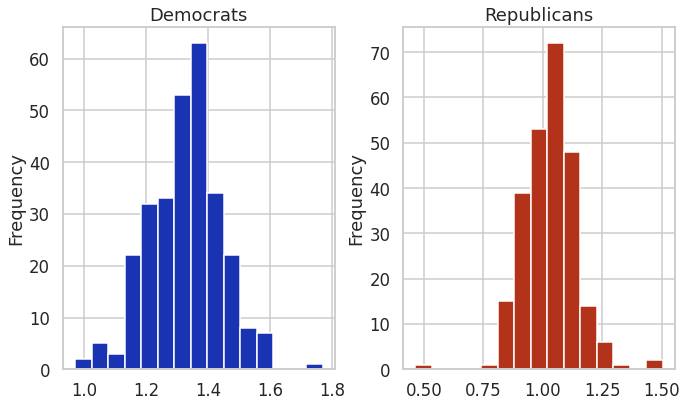

In [ ]:
#Now we can compute the distributions
plt.subplot(1,2,1)
plt.title('Democrats');
plt.tight_layout();
dfDem['Democrat Sentiment'].plot.hist(bins=15,color=(0.1, 0.2, 0.7));
plt.subplot(1,2,2)
plt.tight_layout();
plt.title('Republicans');
dfRep['Republican Sentiment'].plot.hist(bins=15,color=(0.7, 0.2, 0.1));


The average Democrat score is moderalty higher, possibly due to the fact that being the opposition party they are going to discuss both government agenda and their own alternatives while republicans are going to focus on the government agenda which ,as a shared topic, does not allow for as high ratios.

#### Visualisation of partisanship by state:

We are now going to visualise the partisanship metrics for each state MOCs and that for both parties.

In [ ]:
#Need to get the df in a form recognised by plotly i.e. have states represented by their abbreviation


def getState(stt):  # to get the state only and not the district
    for x in StateList:
        if x in stt:
            return x
    
dfDem['State']=dfDem['State'].apply(lambda stt: getState(stt))
dfRep['State']=dfRep['State'].apply(lambda stt: getState(stt))
dfRep=dfRep.groupby(['State']).mean()
dfDem=dfDem.groupby(['State']).mean()
dfRep['State']=dfRep.index.to_series()
dfDem['State']=dfDem.index.to_series()



dfRep['code']=dfRep['State'].apply(lambda state: us_state_abbrev[state]) 
dfDem['code']=dfDem['State'].apply(lambda state: us_state_abbrev[state])


In [ ]:
scl = [[0, 'rgb(255,200,200)'],[1,'rgb(255,0,0)']]

for col in dfRep.columns:
    dfRep[col] = dfRep[col].astype(str)

dfRep['text'] = dfRep.index + '<br>' +\
    'Republican Sentiment '+dfRep['Republican Sentiment']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = dfRep['code'],
        z = dfRep['Republican Sentiment'].astype(float),
        locationmode = 'USA-states',
        text = dfRep['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Sentiment"
        )
    ) ]
layout = dict(
        title = 'Republican Sentiment for Republican Congressmember',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )
fig = dict( data=data, layout=layout )
url = iplot( fig, filename='d3-cloropleth-map' )

Some of the highest scoring MOCs are from the South which was expected. It also appears that the single republican MOC from Maine ,which is a very pro-democrat state, had adapt herself and as a result scores lower than all other republican MOCs.Actually, she scores higher on the democrat metric than on the republican metric as shown below:

In [ ]:
dfRep[dfRep.State=='Maine']

Republican Sentiment  Democrat Sentiment  State code  \
State                                                        
Maine   0.8838421375513584  1.0295291828872133  Maine   ME   

                                                   text  
State                                                    
Maine  Maine<br>Republican Sentiment 0.8838421375513584

In [ ]:
scl2 = [[0,'rgb(131, 168, 242)'], [1,'rgb(0,0,255)']]

for col in dfDem.columns:
    dfDem[col] = dfDem[col].astype(str)


dfDem['text'] = dfDem.index + '<br>' +\
    'Democrat Sentiment '+dfDem['Democrat Sentiment']

data = [ dict(
        type='choropleth',
        colorscale = scl2,
        autocolorscale = False,
        locations = dfDem['code'],
        z = dfDem['Democrat Sentiment'].astype(float),
        locationmode = 'USA-states',
        text = dfDem['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            )
        ),
        colorbar = dict(
            title = "Sentiment"
        )
    ) ]

layout = dict(
        title = 'Democrat Sentiment for Dem Congressmember',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)',
        ),
    )

fig2 = dict( data=data, layout=layout )

url = iplot( fig2, filename='d4-cloropleth-map' )

The Rocky Mountains and the neighboring midwest have some of the lowest scores if any. It seems that democrats MOCs there have to adapt to a more republican-leaning electorate by tempering their discourse. Surprisingly,the highest scoring MOCs are from Mississippi and Louisiana. Contrary to our initial expectations, Southern Democrats are actually among the most partisan ones. Both of them are actually members of the  Congressional Black Caucus and strong advocates of racial equality, giving them high scores as this is mostly a Democrat topic.


# SENTIMENT:

**Goal:**

Our objective is to see if any MOC have a much more emotion-based communication and also look at interparty tweets to see how aggressive they are towards their opponents.

**How ?**

For this, we will use sentiment analysis, a technique meant to measure how positive or negative  a text is. For this, we will again tokenize the tweets of each MOC and use a graded list of words provided by LabMT and compiled using Amazon's Mechanical Turk.
We will then grade them as a whole but also on an tweet by tweet basis so that we can check the standard deviation and make sure they do not "compensate" sad one extreme with the other.


In [ ]:
LabMT  = pd.read_excel("./data/ClasseurTest.xlsx") #the xls is just the .txt with every column removed but word and happiness_average
LabMT=LabMT.set_index('word') 
Scores= LabMT['happiness_average'] 

In [ ]:
def SentimentTokens(tokFreq):  #Associate a sentiment score to the the output of FreqDist ie a list of tokens and their counts
    Sentiment=0
    count=0
    for tok,freq in tokFreq.items():
        if tok in Scores.keys():                    #only scoring words that are in the LabMT list
            Sentiment+=Scores[tok]*freq
            count+=freq
            
    if count !=0:                             #to avoid error when used on empty text or text without any graded words.
        return Sentiment/count
    else:
        return 5.5 #average of 1 to 10

In [ ]:
#Get a sentiment for each MOC in the dataframe

def GetRepSent(datafr):
    See=[]
    for index,row in datafr.iterrows():
        tweet=row['Tweets']
        tokens=[]
        words = word_tokenize(tweet) 
        words = [w.lower() for w in words] 
        words = [word for word in words if not word in pun] 
        words = [word for word in words if word.isalpha()] 
        words = [w for w in words if not w in stops] 
        words = [w for w in words if not len(w) == 1]
        for word in words: #loop through the list of words
            word = lemmatizer.lemmatize(word) #return the lemma of each word
            tokens.append(word)
        See.append(SentimentTokens(nltk.FreqDist(tokens)) )
    return See

In [ ]:
#let's make a dataframe dedicated to this sentiment question
dfSent=Data.copy()
dfSent['Sentiment']=GetRepSent(dfSent)

In [ ]:
print("democrat vs republican overall sentiment :")
print(SentimentTokens(nltk.FreqDist(DemTokens)),SentimentTokens(nltk.FreqDist(RepTokens)))

democrat vs republican overall sentiment :
5.654204787249719 5.725348345440441


<AxesSubplot:ylabel='Frequency'>

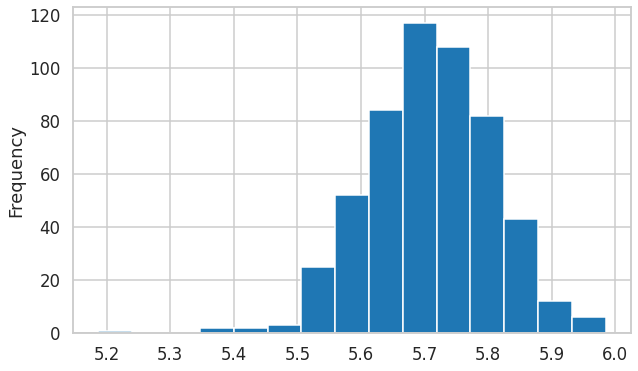

In [ ]:
dfSent.Sentiment.plot.hist(bins=15)

As sentiment is graded from 1 to 10, its average is of 5.5 and the average here is 5.7 and pretty close in both party showing apparently pretty neutral exchanges.

We will look at the standard deviation of each MOC's tweet to make sure that there indeed neutral most of the time:

In [250]:
import statistics
StdDict=defaultdict(list)
for name,List in TwtSentList.items():
    StdDict[name]=statistics.stdev(List)
dfSent['Std']=StdDict

StatisticsError: variance requires at least two data points

In [246]:
TwtSentList

535

#### Interparty intereactions:

We start to by rebuilding some of the network and timelines.

In [ ]:
import twitter

In [132]:
#Secret keys to use the twitter API

consumer_key='JwBGzHlJImbq65zdSbD2t77SC'
consumer_secret='HSStuFy7OpXg35GW4N7iobVDkSvevVmMYkAeC9BJQ0Kl4SNVW2'
access_token_key='1326184476611842050-y74nowqvPo314THVipXtQ5A95DMcHY'
access_token_secret='L6vUq7co4Pstpfzc45wuCyxy4c34DKqQ3xxahH10lgWAl'
#First, let's use the twitter API in order to scrap data

api = twitter.Api(consumer_key=consumer_key,
                consumer_secret=consumer_secret,
                access_token_key=access_token_key,
                access_token_secret=access_token_secret)

In [133]:
TwitterUsernames=list(Data['TwitterUsernames'])

TimelineDict={}
Problem=[]
for name in TwitterUsernames:
    try:
        TimelineDict[name]=(api.GetUserTimeline(screen_name=name, count=200))
    except:
        Problem.append(name)


We are now going to collect nodes that are linked to a node from the other party:

In [ ]:

InterPart=[] #tuple of persons who spoke/were spoken to  with/by the other party
for edge in GCC.edges:
    if GCC.nodes[edge[0]]['Party'] != GCC.nodes[edge[1]]['Party']:
        InterPart.append((edge[0],edge[1]))

Now, we want to evaluate in general the sentiment for cross-party interactions by retrieving the entire tweets posted by MOCs from each party toward the other:

In [ ]:
TxtByRep=[]
TxtByDem=[]
problems=[]
k=0
kk=0
kkk=0
twww=''
for duo in InterPart:
    for i in range(2):
        try:
            for tweet in TimelineDict[duo[i]]:
                k+=1
                if '@{0}'.format(duo[(i+1)%2]) in tweet.text:
                    kk+=1
                    twww=tweet
                    words = word_tokenize(tweet.text) 
                    words = [w.lower() for w in words] 
                    words = [word for word in words if not word in pun] 
                    words = [word for word in words if word.isalpha()] 
                    words = [w for w in words if not w in stops] 
                    words = [w for w in words if not len(w) == 1]
                    for word in words: #loop through the list of words
                        word = lemmatizer.lemmatize(word) #return the lemma of each word
                        if Data[Data['TwitterUsernames']==duo[i]].iloc[0]['Party'] =='Democrat':
                            kkk+=1
                            TxtByDem.append(word)
                        else:
                            TxtByRep.append(word)
        except:
            problems.append(duo[i])



In [ ]:
len(problems),len(Problem) #apparently someone deleted their tweeter account in late nov/early dec

In [ ]:
CrossPartyTwt= defaultdict(list)
for name,twts in TimelineDict.items():
    ThisGuysParty=Data.loc[Data.TwitterUsernames==name].iloc[0]['Party']
    for twt in twts:
        for other in Data[Data['Party']!=ThisGuysParty].TwitterUsernames:
            if other in twt.text:
                CrossPartyTwt[name].append(twt)
                break
    

In [ ]:
CrossPartyTokens= defaultdict(list)

for name,twts in CrossPartyTwt.items():
    for tweet in twts:
        words = word_tokenize(tweet.text) 
        words = [w.lower() for w in words] 
        words = [word for word in words if not word in pun] 
        words = [word for word in words if word.isalpha()] 
        words = [w for w in words if not w in stops] 
        words = [w for w in words if not len(w) == 1]
        for word in words: #loop through the list of words
            word = lemmatizer.lemmatize(word) #return the lemma of each word
            CrossPartyTokens[name].append(word)


CrossPartySentiment= defaultdict(float)

for name,tokens in CrossPartyTokens.items():
    CrossPartySentiment[name]=(SentimentTokens(nltk.FreqDist(tokens)))

for index,row in Data.iterrows():
    if row.iloc[5] not in CrossPartySentiment.keys():
                CrossPartySentiment[row.iloc[5]]=None

Data['Cross_Party_Sentiment']=pd.Series(list(CrossPartySentiment.values()))
CrossPartyDf=Data.loc[:, ['Name','Party','Cross_Party_Sentiment']]
CrossPartyDf=CrossPartyDf.dropna()

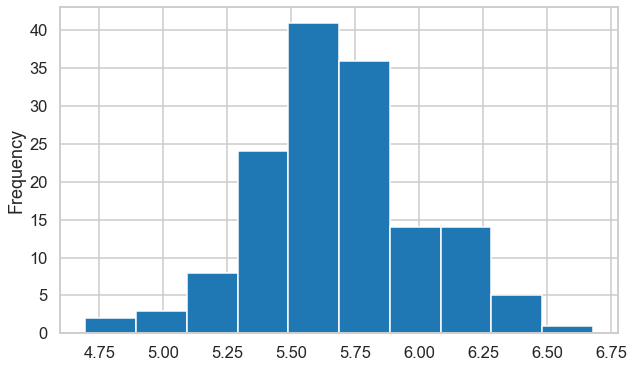

In [141]:
CrossPartyDf[CrossPartyDf.Party=='Republican'].Cross_Party_Sentiment.plot.hist()

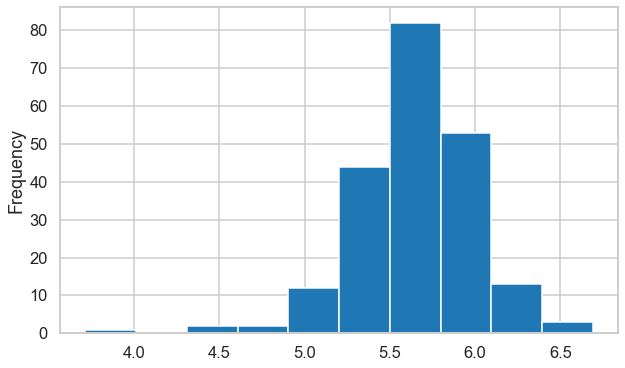

In [142]:
CrossPartyDf[CrossPartyDf.Party=='Democrat'].Cross_Party_Sentiment.plot.hist()

In [138]:
SentimentTokens(nltk.FreqDist(TxtByRep)),SentimentTokens(nltk.FreqDist(TxtByDem))

(5.653780639800591, 5.716247281764524)

Sentiments are extremelly close and slightly above average. They are also comparable to the sentiment of tweet within each party.

We are now going to look for the MOCs with the highest and lowest inter-party sentiment, from the above histograms we can see that there are some pretty low-sentiment outliers even though on average the sentiment is slightly above 5.5 i.e. the average of our grading system.

In [ ]:
CrossDem=CrossPartyDf[CrossPartyDf.Party=='Democrat'].copy()
CrossRep=CrossPartyDf[CrossPartyDf.Party=='Republican'].copy()
CrossDem=CrossDem.set_index('Name')
CrossDem=CrossDem.drop('Party',axis=1)
CrossRep=CrossRep.set_index('Name')
CrossRep=CrossRep.drop('Party',axis=1)
#sentiment is usually around 5.6 so we take two tresholds around 0.6 from that average

CentristDem=CrossDem[CrossDem.Cross_Party_Sentiment>6.25].copy()
AngryDem=CrossDem[CrossDem.Cross_Party_Sentiment<5].copy()

CentristRep=CrossRep[CrossRep.Cross_Party_Sentiment>6.25].copy()
AngryRep=CrossRep[CrossRep.Cross_Party_Sentiment<5].copy()

Now that we isolated those outliers, we are going to look at at their individual position on the political spectrum by checking their caucuses and their twitterfeed.

In [144]:
print(AngryDem.head(10))

                  Cross_Party_Sentiment
Name                                   
lofgren zoe                    4.853333
underwood lauren               4.873333
pingree chellie                3.713333
cardin benjamin                4.580000
norcross donald                4.947273
lujan ben r.                   4.409412
butterfield g.k.               4.910000


Chellie Pingree is the MOC with the lowest interparty sentiment which is not surprising for the vice chair of the Congressional Progressive Caucus, the most left-leaning faction of the Democratic Party.Andy Kim and Zoe Lofgren also belongs to this caucus which has 3 of the 5 "agressive" Dem MOC.

In [145]:
print(CentristDem.head(20))

                          Cross_Party_Sentiment
Name                                           
mcnerney jerry                         6.344000
bennet michael                         6.340000
wasserman schultz debbie               6.265000
quigley mike                           6.264000
davis danny k.                         6.346667
craig angie                            6.360000
clay jr. william “lacy”                6.462857
payne jr. donald                       6.265000
meng grace                             6.586667
price david                            6.690000


Jesus “Chuy” Garcia, Bonnie Watson Coleman and Hakeem Jeffries are left wing Democrats, yet found in this group of high interparty sentiment.

In [146]:
print(AngryRep.head(10))

                   Cross_Party_Sentiment
Name                                    
mast brian                         4.696
diaz-balart mario                  4.936
davis rodney                       4.860


In [147]:
print(CentristRep.head(10))

                Cross_Party_Sentiment
Name                                 
sullivan dan                 6.348889
gosar paul a.                6.270000
rooney francis               6.463333
massie thomas                6.267500
higgins clay                 6.350526
hawley josh                  6.676667
graves sam                   6.377143
bacon don                    6.360000


The only Republican with an interparty sentiment below 5 is a hardliner but so is Virgininia Foxx, the highest scoring one.

Overall, it appears that interparty sentiment is not that strongly linked to political dissent with centrist and hardliners from both party in the high interparty sentiment group. Interactions with the other party are most likely dependent on each personal style and professionalism.

## 4. Discussion

### 4.1 What went well?

Regarding our project, data collecting and analysis of the Twitter account of the 2020 US Representatives and Senators was been a success! We are confident that Twitter is a valuable source in extracting information of the portrait politicians. From the network science perspective, the graph connecting the activity (replies/retweets) of the politicians is representative of their activity and political life.
The tools,theory and analysis provide many insights and has overall has been a meaningful project to work on.

The partisanship analysis went well in term of identifying partisan connotations and its visualization provided some new insights. The use of TF-TR instead of the unsatisfactory "partisanship" list available online was also a success.

### 4.2 What is still missing? What could be improved?, Why?

What could be improved, based on our judgment, was the  data enhancement , by gathering more from different other sources like news articles, as well as other social media sources even though Twitter is still a valuable and representative source. We believe that combining even more sources for our analysis could make the project even more informative. Moreover, There was one attempt to make an extra bipartite graph that connected the US Representatives and Senator to each law (that passed on 2020) that they sponsored/cosponsored. We decided not include this to the explainer notebook because it didn't provide any extra informative insights to our analysis.

One of the things that we consider interesting and we would like to delve deeper is some further text analysis. We started analysing the **hashtags** of each party and plotted the correlation of them. Of course, this is not enough in order to extract valuable information. We can see the most used hashtags of each party and how they correlate. 

Therefore, we would like to investigate more on the content of each party Tweets and, also, extract main covered topics by using statistical models, like the *Latent Dirichlet Allocation (LDA)* \[10]. 

Finaly, there were several issues with the NLP, some of which could only be partly solved. For example, the interparty tweet analysis is hindered by both our unability to detect irony and the fact that retweets include the inital tweet meaning that short reactions tend to be diluted in the original message. <br>
Another issue was with partisanship measurement, it was initially conducted based on grassroots tweets which differed significantly in term of register thus leading to extremely low score for the most formal MCOs.  

Improvements could be made by working at a lower level, tweet by tweet, to try and identify  events and topics that caused a surge in bipartisan dialogue.

## 5. Contribution 

* Electra Zarafeta - s202238:   

        A. 2.1 | Twitter Scraper (Account organization, Dataset fetching/storing)  
        B. 2.3 | Basic Stats (In/Out degree distribution, Per party Nodes/Edges hist, ForceAtlas coloured network graph)  
        C. 3.1 | TF-TR wordclouds
        D. 3.3 | Core/Truss Decomposition Analysis
        E. 3.4.1 | Combining communities with k-truss influential nodes
        F. 4.2 | Hashtags Analysis/ Correlation
        G. Contribution on website creation  
        H. Contribution on code organization and commenting 

* Asterios Nastas - s202242:

        A. Part A | 3 minute movie creation  
        B. 1 | Motivation
        C. 3.2 | Communities and TF-IDF Analysis
        D. 3.4.2 | Word Clouds of top candidates and their communities
        E. Contribution on website creation
        F. Contribution on code organization and commenting

* Idriss El Quassimi - s192383: 

        A. 3.5 | Sentiment and partisanship analysis
        B. Contribution on code organization and commenting
        C. Contribution on website creation

#### References: 
\[1] https://triagecancer.org/congressional-social-media  
\[2] https://en.wikipedia.org/wiki/2020_United_States_House_of_Representatives_elections  
\[3] https://ballotpedia.org/United_States_House_of_Representatives_elections,_2020  
\[4] https://www.nytimes.com/interactive/2020/11/03/us/elections/results-senate.html  
\[5] https://www.republicanleader.gov/commitment/  
\[6] https://en.wikipedia.org/wiki/Operation_Warp_Speed  
\[7] https://www.bbc.com/news/election-us-2020-54806677  
\[8] Malliaros, Fragkiskos D. et al. *“Core Decomposition in Graphs: Concepts, Algorithms and Applications.”* EDBT (2016).  
\[9] Jia Wang and James Cheng. 2012. *Truss decomposition in massive networks.* Proc. VLDB Endow. 5, 9 (May 2012), 812–823.  
\[10] https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation